# AM 207: LUNA
## NLM Experiments

In [1]:
import sys; sys.path.insert(0, "..")
from src.models import NLM
from src.utils import generate_data, neg_log_likelihood, epistemic_uncertainty

In [2]:
from autograd import numpy as np
import matplotlib.pyplot as plt

## Generate Synthetic Data

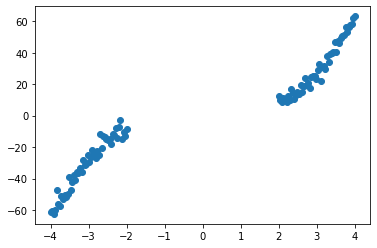

In [3]:
x, y, x_test, y_test = generate_data(number_of_points=50, noise_variance=9)

plt.scatter(x, y)
plt.show()

## Regularization

**Question**: At what regularization level does good epistemic uncertainty behavior collapse?

### Setup NLM

In [4]:
###relu activation
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

width = [50,50] # using the architecture used in the paper
hidden_layers = len(width)
input_dim = 1
output_dim = 1

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': 'relu',
               'activation_fn_params': 'rate=1',
               'activation_fn': activation_fn}

#set random state to make the experiments replicable
rand_state = 207
random = np.random.RandomState(rand_state)

#instantiate a Feedforward neural network object
nn = NLM(architecture, random=random)
print('Number of parameters =',nn.D)

### define design choices in gradient descent
params = {
    'step_size':1e-2,
    'max_iteration':5000,
    'random_restarts':1,
    'reg_param':100.,
    'lambda_in':100.,
}

# fit LUNA
nn.fit(x.reshape((1, -1)), y.reshape((1, -1)), params)

Number of parameters = 2701


In [5]:
prior_var = 9
noise_var = 9

### Regularziation Parameter Search

In [6]:
reg_params = [0, 10, 100, 1000]

In [7]:
nlms = []

for reg_param in reg_params:
    print("Regulariation parameter: {}".format(reg_param))
    params['reg_param'] = reg_param
    nn_i = NLM(architecture, random=random)
    nlms.append(nn_i)
    nn_i.fit(x.reshape((1, -1)), y.reshape((1, -1)), params)
    print("")

Regulariation parameter: 0
Iteration 0 loss 6221.301699214357; gradient mag: 15463.155836173877
Iteration 100 loss 14.863619138536883; gradient mag: 60.26812939049194
Iteration 200 loss 12.751707078913594; gradient mag: 5.249676220885885
Iteration 300 loss 11.992939794032312; gradient mag: 3.12333603236037
Iteration 400 loss 11.393087918711778; gradient mag: 2.007334920232229
Iteration 500 loss 11.031265126079845; gradient mag: 2.088568860407601
Iteration 600 loss 10.797963767200665; gradient mag: 0.973379694268193
Iteration 700 loss 10.665747178261451; gradient mag: 1.4185576928040242
Iteration 800 loss 10.594719333243715; gradient mag: 1.0408817524571221
Iteration 900 loss 10.458790618980338; gradient mag: 2.4221689842270955
Iteration 1000 loss 10.42620381276902; gradient mag: 1.2739002361840543
Iteration 1100 loss 10.412217592499037; gradient mag: 0.9162499559366186
Iteration 1200 loss 10.406243951481493; gradient mag: 0.846918704656661
Iteration 1300 loss 10.41051753736012; gradien

Iteration 1400 loss 15.69674563873372; gradient mag: 5.845125039772797
Iteration 1500 loss 15.616671724767775; gradient mag: 9.041506461732526
Iteration 1600 loss 15.547616643695001; gradient mag: 7.391758371473625
Iteration 1700 loss 15.485676482758588; gradient mag: 6.157533071578747
Iteration 1800 loss 15.421740626568184; gradient mag: 15.072534514563623
Iteration 1900 loss 15.346839175091214; gradient mag: 10.031720185437052
Iteration 2000 loss 15.272938270761523; gradient mag: 2.532649143682086
Iteration 2100 loss 15.291249585634358; gradient mag: 71.81077044915904
Iteration 2200 loss 15.141166013413118; gradient mag: 5.070393214166046
Iteration 2300 loss 15.122861203206597; gradient mag: 50.398941470445486
Iteration 2400 loss 15.079747587260504; gradient mag: 54.66288672460307
Iteration 2500 loss 15.010393153011876; gradient mag: 59.322443496461155
Iteration 2600 loss 14.882579316010512; gradient mag: 24.4746831838359
Iteration 2700 loss 14.821074132040632; gradient mag: 24.89944

Iteration 2800 loss 22.069819443285184; gradient mag: 13.565414051607632
Iteration 2900 loss 21.532446942249663; gradient mag: 8.092449911175109
Iteration 3000 loss 21.03498395535805; gradient mag: 9.466464883138249
Iteration 3100 loss 20.556817079528983; gradient mag: 7.554801901607514
Iteration 3200 loss 20.154297684826737; gradient mag: 28.316400557902938
Iteration 3300 loss 19.680050094150587; gradient mag: 4.726364374061188
Iteration 3400 loss 19.32672890515014; gradient mag: 26.877180786630973
Iteration 3500 loss 18.894602230236902; gradient mag: 6.142327324211791
Iteration 3600 loss 18.53452240424252; gradient mag: 6.188909775933205
Iteration 3700 loss 18.199118361024233; gradient mag: 12.602921685157241
Iteration 3800 loss 17.874552293327568; gradient mag: 7.212837051344651
Iteration 3900 loss 17.616937358775658; gradient mag: 22.947002215071308
Iteration 4000 loss 17.337460374097347; gradient mag: 21.21200776308129
Iteration 4100 loss 17.09303034689731; gradient mag: 26.120734

Iteration 4200 loss 45.36794103655339; gradient mag: 5.1657843774854015
Iteration 4300 loss 45.311209307893016; gradient mag: 8.947213345355658
Iteration 4400 loss 45.25303811418516; gradient mag: 12.95200966479752
Iteration 4500 loss 45.16531499228012; gradient mag: 5.574875441529962
Iteration 4600 loss 45.112393402536796; gradient mag: 3.719212174311175
Iteration 4700 loss 45.03833091327919; gradient mag: 16.272894468083354
Iteration 4800 loss 44.969906785299976; gradient mag: 9.516941106330588
Iteration 4900 loss 44.93189257392527; gradient mag: 12.196119059637919
Iteration 5000 loss 44.89744989009453; gradient mag: 10.882586572623108
Iteration 5100 loss 44.900133685035314; gradient mag: 17.186592486616924
Iteration 5200 loss 44.88429479997648; gradient mag: 16.36624173717638
Iteration 5300 loss 44.84406499058422; gradient mag: 6.5961683786501215
Iteration 5400 loss 44.84155817852685; gradient mag: 10.19024942960112
Iteration 5500 loss 44.82325904923591; gradient mag: 4.106521446839

### Trace Plots

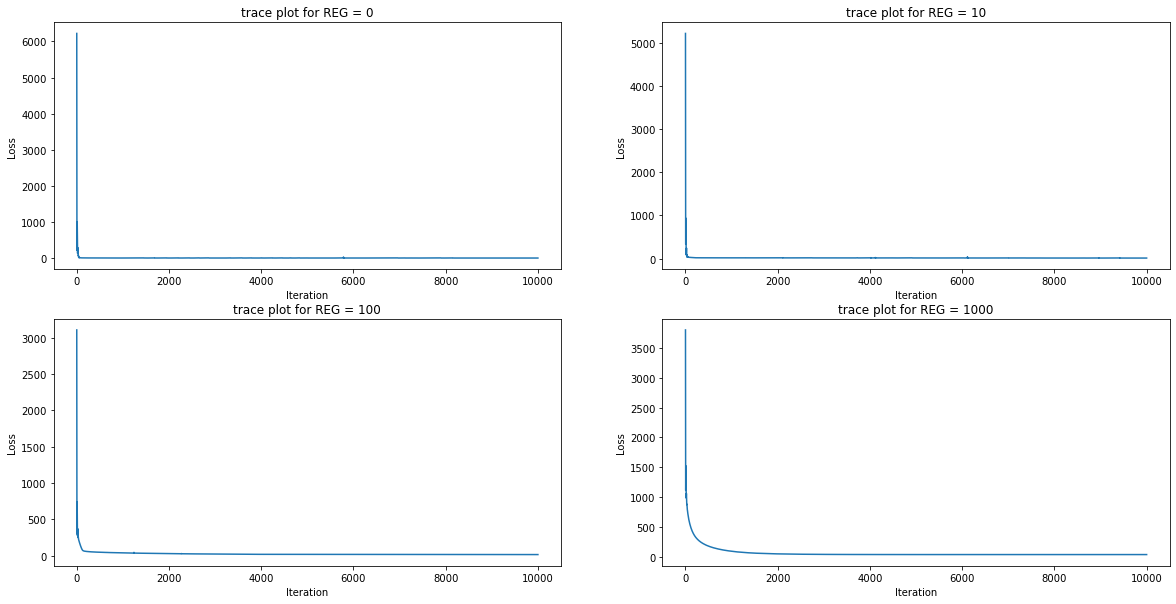

In [8]:
fig, axs = plt.subplots(2, 2, figsize = (20, 10))

for i, ax in enumerate(axs.ravel()):
    ax.plot(nlms[i].objective_trace)
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Loss')
    ax.set_title("trace plot for REG = {}".format(reg_params[i]))
    
plt.show()

### MAP Models

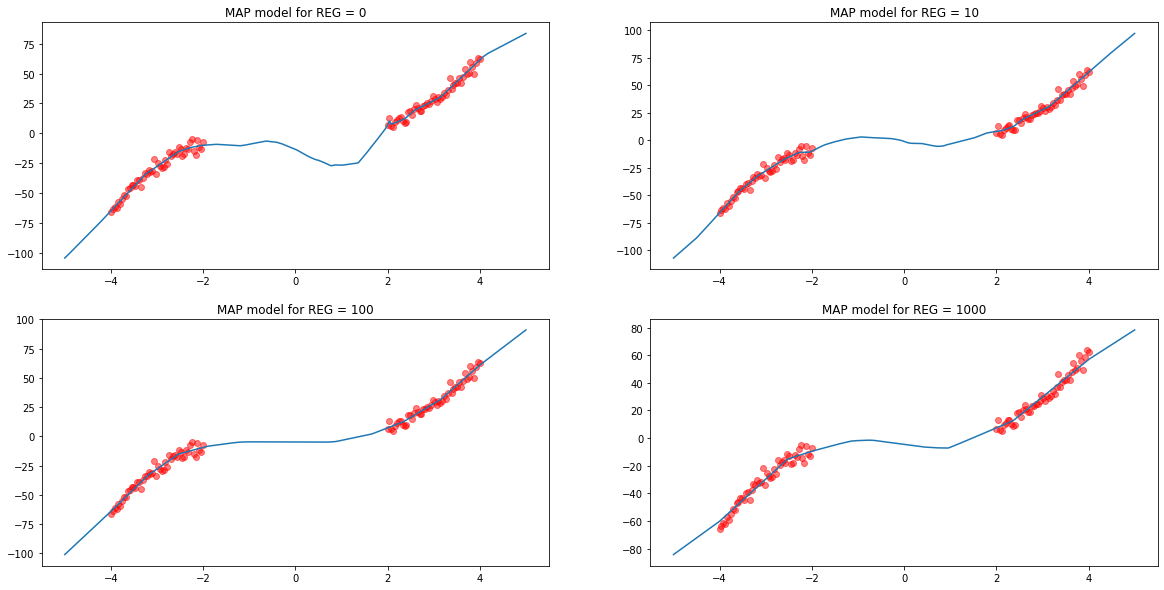

In [9]:
fig, axs = plt.subplots(2, 2, figsize = (20, 10))

for i, ax in enumerate(axs.ravel()):
    nlm = nlms[i]
    y_pred = nlm.forward(nlm.weights, x_test)

    ax.scatter(x, y, color = 'r', alpha = 0.5)
    ax.plot(x_test[0, :], y_pred.flatten())

    ax.set_title("MAP model for REG = {}".format(reg_params[i]))

plt.show()

### Prior Samples

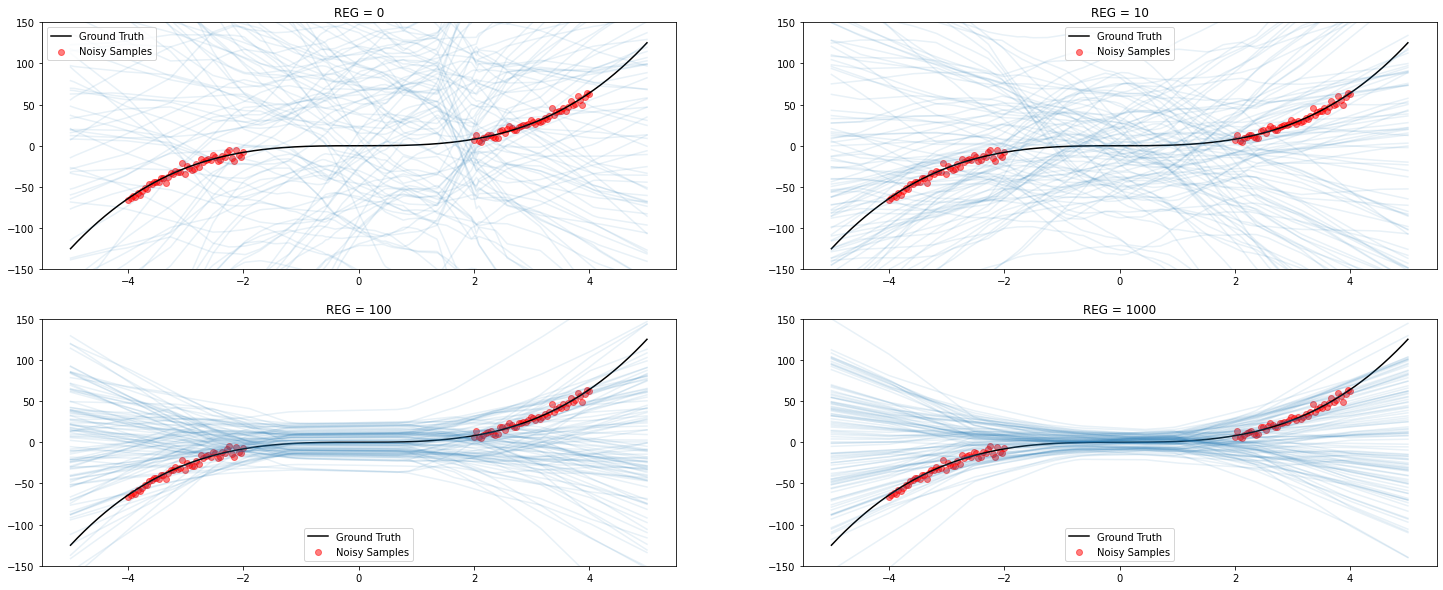

In [10]:
fig, axs = plt.subplots(2, 2, figsize = (25, 10))

for i, ax in enumerate(axs.ravel()):
    nlm = nlms[i]
    y_prior = nlm.get_prior_preds(x_test, w_prior_mean = 0, w_prior_cov = prior_var, noise_var = noise_var)
        
    ax.scatter(x,y, color='red', alpha = 0.5, label='Noisy Samples')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
    ax.plot(x_test[0,:], y_prior.T, color='tab:blue', alpha=0.1)
    
    ax.set_ylim([-150, 150])
    
    ax.legend()

    ax.set_title("REG = {}".format(reg_params[i]))

plt.show()

### Posterior Samples

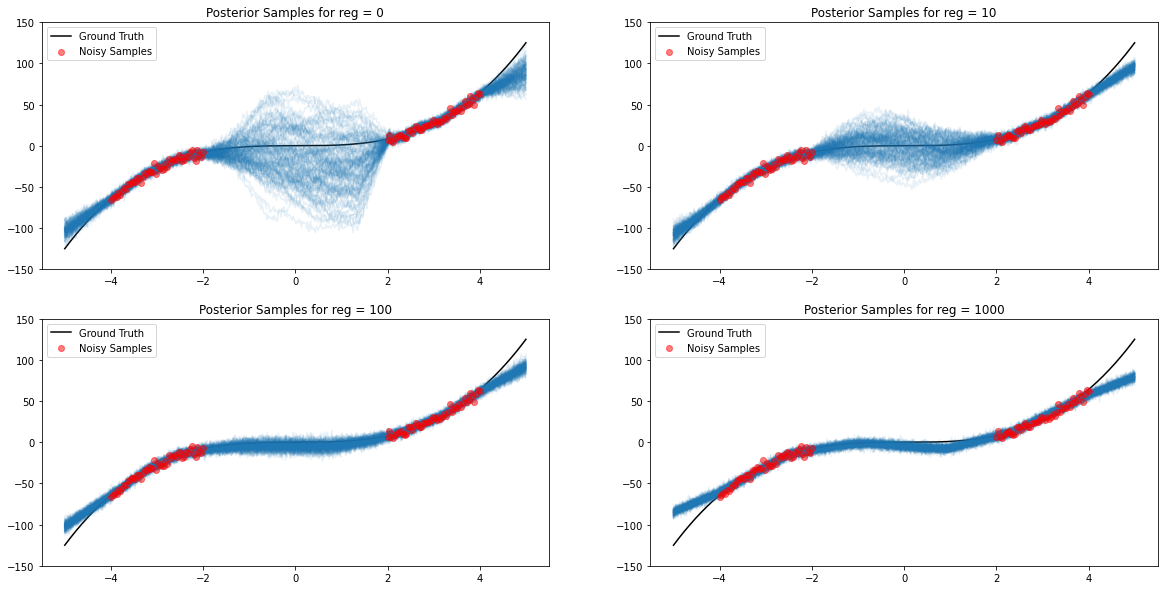

In [11]:
fig, axs = plt.subplots(2, 2, figsize = (20, 10))

for i, ax in enumerate(axs.ravel()):
    nlm = nlms[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
    y_posterior = y_posterior + np.random.normal(0, noise_var**0.5, size=y_posterior.shape)
    
    ax.plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
    ax.plot(x_test[0,:], y_posterior.T, color='tab:blue', alpha=0.1)
    ax.scatter(x, y, color='red', alpha = 0.5, label='Noisy Samples', zorder = 10)
    
    ax.set_ylim([-150, 150])
    
    ax.legend()

    ax.set_title("Posterior Samples for reg = {}".format(reg_params[i]))

plt.show()

### Negative Log-Likelihood and Epistemic Uncertainty

In [12]:
# Compute neg_log_likelihood and epistemic uncertainty on test data (gap vs. non-gap)
gap_idx = np.logical_and(x_test > -2, x_test < 2)
x_test_gap = x_test[gap_idx].reshape(1,-1)
y_test_gap = x_test_gap**3

non_gap_idx = np.logical_or(np.logical_and(x_test > -4, x_test < -2),np.logical_and(x_test > 2, x_test < 4))
x_test_non_gap = x_test[non_gap_idx].reshape(1,-1)
y_test_non_gap = x_test_non_gap**3

lls_train = []
eus_gap = []
lls_test = []
eus_non_gap = []

for nlm in nlms:
    posterior_predictive_train = nlm.get_posterior_preds(x, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    posterior_predictive_train = posterior_predictive_train + np.random.normal(0, noise_var**0.5, size=posterior_predictive_train.shape)

    posterior_predictive_gap = nlm.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    posterior_predictive_gap = posterior_predictive_gap + np.random.normal(0, noise_var**0.5, size=posterior_predictive_gap.shape)
    
    posterior_predictive_non_gap = nlm.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    posterior_predictive_non_gap = posterior_predictive_non_gap + np.random.normal(0, noise_var**0.5, size=posterior_predictive_non_gap.shape)

    lls_train.append(neg_log_likelihood(posterior_predictive_train, y, noise_var) * -1)
    lls_test.append(neg_log_likelihood(posterior_predictive_non_gap, y_test_non_gap, noise_var) * -1)
    
    eus_gap.append(epistemic_uncertainty(posterior_predictive_gap))
    eus_non_gap.append(epistemic_uncertainty(posterior_predictive_non_gap))

### Final Results

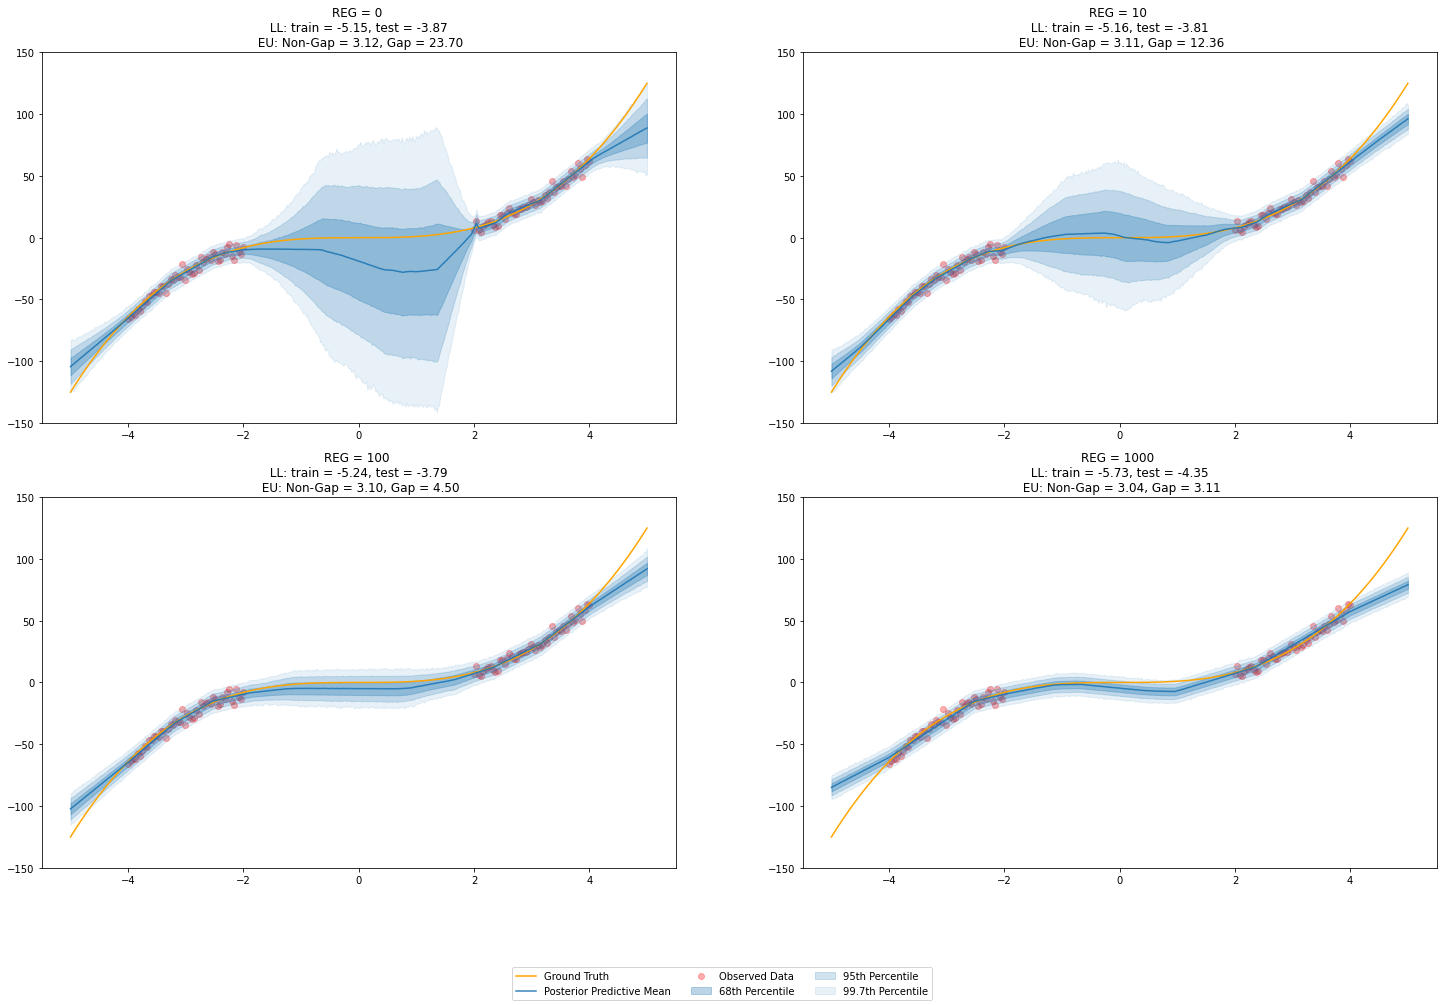

In [16]:
fig, axs = plt.subplots(2, 2, figsize = (25, 15))

for i, ax in enumerate(axs.ravel()):
    nlm = nlms[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior = y_posterior + np.random.normal(0, noise_var**0.5, size=y_posterior.shape)

    # Calculating Percentiles
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_upper2 = np.percentile(y_posterior, 84, axis=0)
    pp_lower2 = np.percentile(y_posterior, 16, axis=0)
    pp_upper3 = np.percentile(y_posterior, 99.85, axis=0)
    pp_lower3 = np.percentile(y_posterior, 0.15, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)

    # Visualizing 68%/95%/99.7% posterior predictive interval of Bayesian polynomial regression
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], y_test[0,:], color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], pp_mean, color='tab:blue', alpha=0.9, label='Posterior Predictive Mean')
    ax.fill_between(x_test[0,:], pp_upper2, pp_lower2, color = 'tab:blue', alpha = 0.3, label="68th Percentile")
    ax.fill_between(x_test[0,:], pp_upper, pp_lower, color='tab:blue', alpha=0.2, label="95th Percentile")
    ax.fill_between(x_test[0,:], pp_upper3, pp_lower3, color = 'tab:blue', alpha = 0.1, label="99.7th Percentile")
        
    ax.set_ylim([-150, 150])
    
    ax.set_title("REG = {:.0f} \n LL: train = {:.2f}, test = {:.2f} \n EU: Non-Gap = {:.2f}, Gap = {:.2f}".format(reg_params[i], lls_train[i], lls_test[i], eus_non_gap[i], eus_gap[i]))

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3)

plt.show()

Desired uncertainty behavior in the gap (data-scare) region occurs somewhere between REG = 10 and REG = 100. The train log-likelihoods of all models are very similar and so do not help pick out a model that distinguishies between the data-scare and data-poor regions. Likewise, the test log-likelihood are also similar. 

### Regularization Parameters: [20, 90]

In [6]:
reg_params = [20, 30, 40, 50, 60, 70]

In [7]:
nlms = []

for reg_param in reg_params:
    print("Regulariation parameter: {}".format(reg_param))
    params['reg_param'] = reg_param
    nn_i = NLM(architecture, random=random)
    nlms.append(nn_i)
    nn_i.fit(x.reshape((1, -1)), y.reshape((1, -1)), params)
    print("")

Regulariation parameter: 20
Iteration 0 loss 6157.190405397128; gradient mag: 15408.585092692463
Iteration 100 loss 26.387119959266933; gradient mag: 39.01109369252418
Iteration 200 loss 23.16934650608571; gradient mag: 23.00010482066901
Iteration 300 loss 22.320835544792004; gradient mag: 14.075513495627513
Iteration 400 loss 22.00794694490785; gradient mag: 7.239191174840043
Iteration 500 loss 21.728837197094492; gradient mag: 25.806249251575704
Iteration 600 loss 21.436348692497816; gradient mag: 4.806881788442641
Iteration 700 loss 21.186614140388457; gradient mag: 19.543597499697142
Iteration 800 loss 20.900008008733614; gradient mag: 5.209773808224812
Iteration 900 loss 20.682055722512676; gradient mag: 35.164701743362215
Iteration 1000 loss 20.452743578927826; gradient mag: 45.51171954890805
Iteration 1100 loss 20.38315635257127; gradient mag: 103.67353172329065
Iteration 1200 loss 19.979839774702313; gradient mag: 38.397053968241174
Iteration 1300 loss 19.70793204639655; gradie

Iteration 1400 loss 25.26908655027612; gradient mag: 17.4336016263769
Iteration 1500 loss 24.951372719279007; gradient mag: 25.10702881735403
Iteration 1600 loss 24.6127226269847; gradient mag: 7.689010197201607
Iteration 1700 loss 24.30095239320272; gradient mag: 5.995409199317551
Iteration 1800 loss 23.978699793354682; gradient mag: 13.355304357351569
Iteration 1900 loss 23.702944540898798; gradient mag: 49.41435261353503
Iteration 2000 loss 23.39695989765839; gradient mag: 39.87345626902584
Iteration 2100 loss 23.024418791505717; gradient mag: 7.574628421096455
Iteration 2200 loss 22.784695886032402; gradient mag: 49.72669961213431
Iteration 2300 loss 22.47686148711483; gradient mag: 15.633741080455001
Iteration 2400 loss 22.19075035491999; gradient mag: 53.42551451399004
Iteration 2500 loss 23.031688142382222; gradient mag: 232.962348174953
Iteration 2600 loss 21.536856764609038; gradient mag: 2.1247998309728646
Iteration 2700 loss 21.25311091772136; gradient mag: 1.552061642495465

Iteration 2800 loss 17.69638256567346; gradient mag: 30.640659787520978
Iteration 2900 loss 17.42619103885292; gradient mag: 26.166538721367406
Iteration 3000 loss 17.14978104390127; gradient mag: 15.8054929610432
Iteration 3100 loss 17.28236410804915; gradient mag: 89.38291837395548
Iteration 3200 loss 16.68873241723476; gradient mag: 27.007486249593008
Iteration 3300 loss 16.421061057316013; gradient mag: 9.098425943276482
Iteration 3400 loss 16.214685582870064; gradient mag: 8.587073567140878
Iteration 3500 loss 16.024234065872616; gradient mag: 23.7512236382764
Iteration 3600 loss 15.806762277532664; gradient mag: 24.51200236099615
Iteration 3700 loss 15.594923456867901; gradient mag: 19.89217162854454
Iteration 3800 loss 15.384490249093968; gradient mag: 8.376989565167984
Iteration 3900 loss 15.208647556017905; gradient mag: 13.360013026201946
Iteration 4000 loss 15.025041110765802; gradient mag: 9.76636760406215
Iteration 4100 loss 14.869599728912668; gradient mag: 21.23918088747

Iteration 4200 loss 15.384645139968661; gradient mag: 11.132474188297982
Iteration 4300 loss 15.191246807211048; gradient mag: 16.85401794133978
Iteration 4400 loss 14.992465492411021; gradient mag: 13.063302454075027
Iteration 4500 loss 14.820358893238435; gradient mag: 18.447456030050503
Iteration 4600 loss 14.630860112996357; gradient mag: 9.623845490362019
Iteration 4700 loss 14.559666843591067; gradient mag: 41.14378284164752
Iteration 4800 loss 14.551158299584715; gradient mag: 60.38064959107233
Iteration 4900 loss 14.12912585651128; gradient mag: 16.645173088940535
Iteration 5000 loss 14.057370645930394; gradient mag: 37.216204439835906
Iteration 5100 loss 13.818711273501314; gradient mag: 22.23887016493624
Iteration 5200 loss 13.624943806750103; gradient mag: 2.9169849906062417
Iteration 5300 loss 13.567600328956086; gradient mag: 31.8063594338409
Iteration 5400 loss 13.415987759727143; gradient mag: 19.776748754627086
Iteration 5500 loss 13.294407761121283; gradient mag: 22.55

Iteration 5600 loss 14.701953298670194; gradient mag: 8.183520218072536
Iteration 5700 loss 14.608531873473911; gradient mag: 27.94412322250656
Iteration 5800 loss 14.54427713132523; gradient mag: 43.53210212161211
Iteration 5900 loss 14.303139917112537; gradient mag: 11.643437933368858
Iteration 6000 loss 14.17186362567676; gradient mag: 5.3941801353029595
Iteration 6100 loss 14.052857492146003; gradient mag: 3.042737423957079
Iteration 6200 loss 13.939658796997696; gradient mag: 9.17146462196416
Iteration 6300 loss 13.832968402525779; gradient mag: 5.16643420816712
Iteration 6400 loss 13.734954439286025; gradient mag: 8.848800023840088
Iteration 6500 loss 13.64020202040369; gradient mag: 7.069571201564108
Iteration 6600 loss 13.561337977000868; gradient mag: 15.431514682211532
Iteration 6700 loss 13.512729299385548; gradient mag: 26.381825591862597
Iteration 6800 loss 13.390637990478405; gradient mag: 14.747143504690866
Iteration 6900 loss 13.399042714809324; gradient mag: 36.0663708

Iteration 7000 loss 14.045860090690196; gradient mag: 16.389938260451373
Iteration 7100 loss 13.930416535200145; gradient mag: 7.65692099514856
Iteration 7200 loss 13.842440980715773; gradient mag: 10.710047643545014
Iteration 7300 loss 13.755947196977093; gradient mag: 12.560377611054346
Iteration 7400 loss 13.665622948050034; gradient mag: 5.4113158864414315
Iteration 7500 loss 13.591294958689474; gradient mag: 11.81642244472154
Iteration 7600 loss 13.512769070619502; gradient mag: 8.296921679348099
Iteration 7700 loss 13.44009681600146; gradient mag: 5.244311131261829
Iteration 7800 loss 13.371692888436904; gradient mag: 3.2868887958468176
Iteration 7900 loss 13.364762411787064; gradient mag: 18.32374736465271
Iteration 8000 loss 13.283999951022109; gradient mag: 12.371055022706779
Iteration 8100 loss 13.222506788419217; gradient mag: 10.706523049937342
Iteration 8200 loss 13.191365947398188; gradient mag: 18.765992887803957
Iteration 8300 loss 13.128740188395241; gradient mag: 8.47

In [8]:
# Compute neg_log_likelihood and epistemic uncertainty on test data (gap vs. non-gap)
gap_idx = np.logical_and(x_test > -2, x_test < 2)
x_test_gap = x_test[gap_idx].reshape(1,-1)
y_test_gap = x_test_gap**3

non_gap_idx = np.logical_or(np.logical_and(x_test > -4, x_test < -2),np.logical_and(x_test > 2, x_test < 4))
x_test_non_gap = x_test[non_gap_idx].reshape(1,-1)
y_test_non_gap = x_test_non_gap**3

lls_train = []
eus_gap = []
lls_test = []
eus_non_gap = []

for nlm in nlms:
    posterior_predictive_train = nlm.get_posterior_preds(x, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    posterior_predictive_train = posterior_predictive_train + np.random.normal(0, noise_var**0.5, size=posterior_predictive_train.shape)

    posterior_predictive_gap = nlm.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    posterior_predictive_gap = posterior_predictive_gap + np.random.normal(0, noise_var**0.5, size=posterior_predictive_gap.shape)
    
    posterior_predictive_non_gap = nlm.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    posterior_predictive_non_gap = posterior_predictive_non_gap + np.random.normal(0, noise_var**0.5, size=posterior_predictive_non_gap.shape)

    lls_train.append(neg_log_likelihood(posterior_predictive_train, y, noise_var) * -1)
    lls_test.append(neg_log_likelihood(posterior_predictive_non_gap, y_test_non_gap, noise_var) * -1)
    
    eus_gap.append(epistemic_uncertainty(posterior_predictive_gap))
    eus_non_gap.append(epistemic_uncertainty(posterior_predictive_non_gap))

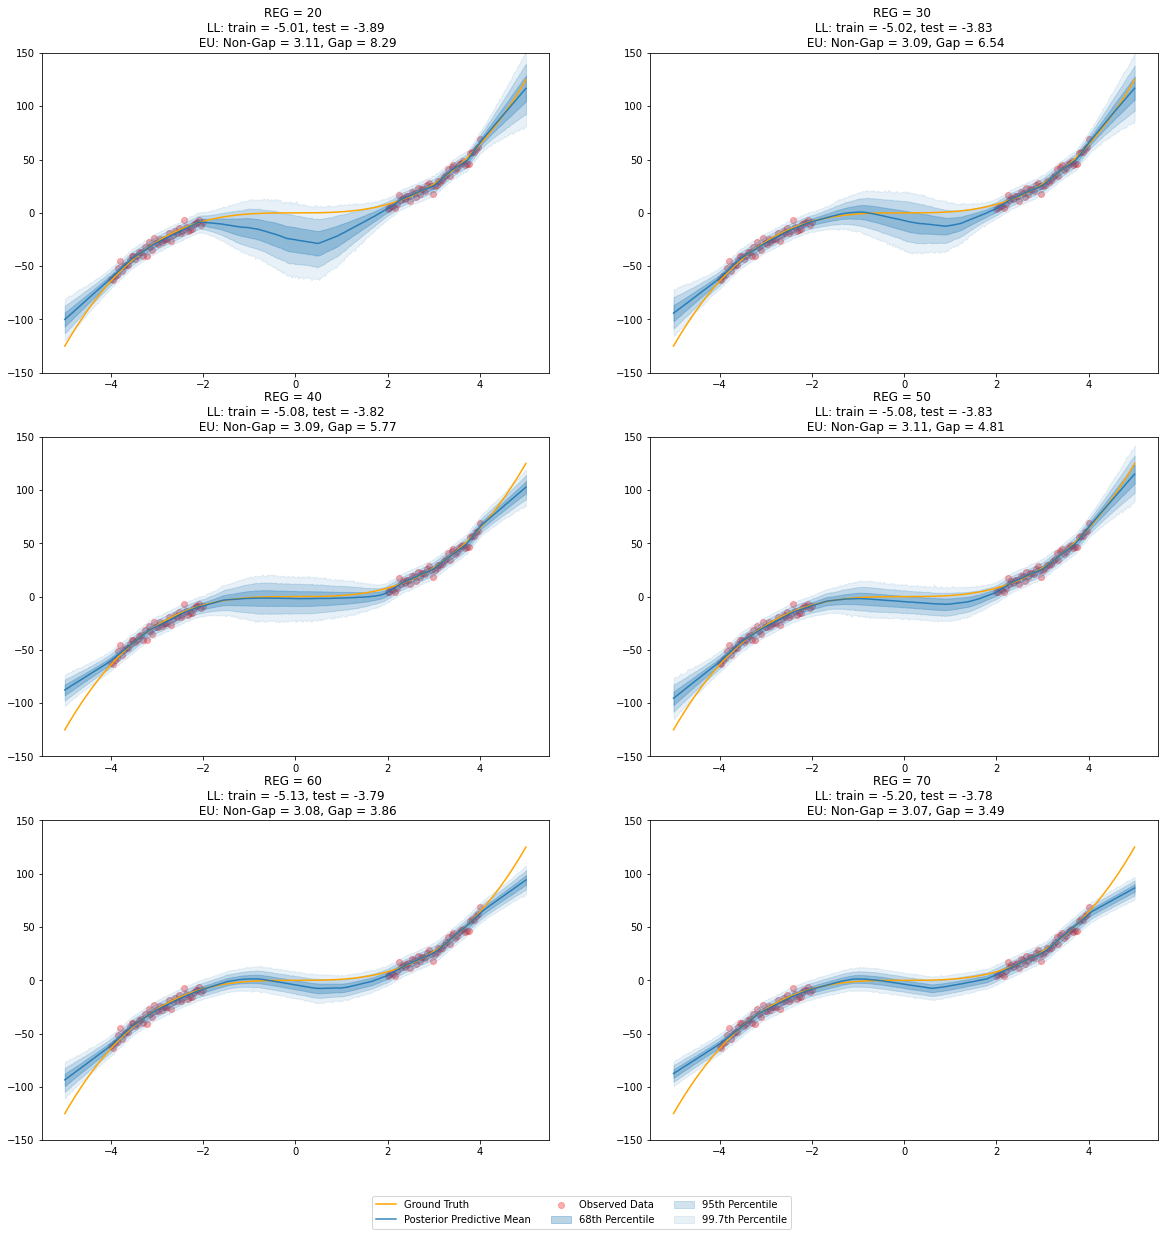

In [26]:
fig, axs = plt.subplots(3, 2, figsize = (20, 20))

for i, ax in enumerate(axs.ravel()):
    nlm = nlms[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior = y_posterior + np.random.normal(0, noise_var**0.5, size=y_posterior.shape)

    # Calculating Percentiles
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_upper2 = np.percentile(y_posterior, 84, axis=0)
    pp_lower2 = np.percentile(y_posterior, 16, axis=0)
    pp_upper3 = np.percentile(y_posterior, 99.85, axis=0)
    pp_lower3 = np.percentile(y_posterior, 0.15, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)

    # Visualizing 68%/95%/99.7% posterior predictive interval of Bayesian polynomial regression
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], y_test[0,:], color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], pp_mean, color='tab:blue', alpha=0.9, label='Posterior Predictive Mean')
    ax.fill_between(x_test[0,:], pp_upper2, pp_lower2, color = 'tab:blue', alpha = 0.3, label="68th Percentile")
    ax.fill_between(x_test[0,:], pp_upper, pp_lower, color='tab:blue', alpha=0.2, label="95th Percentile")
    ax.fill_between(x_test[0,:], pp_upper3, pp_lower3, color = 'tab:blue', alpha = 0.1, label="99.7th Percentile")
        
    ax.set_ylim([-150, 150])
    
    ax.set_title("REG = {:.0f} \n LL: train = {:.2f}, test = {:.2f} \n EU: Non-Gap = {:.2f}, Gap = {:.2f}".format(reg_params[i], lls_train[i], lls_test[i], eus_non_gap[i], eus_gap[i]))

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor = (0.5, 0.06))

plt.show()

Desired uncertainty behavior appears to collapse between REG = 50 and REG = 60. Once again, train and test log-likelihoods are very similar and do not help pick a model that distinguishes between data-scare and data-rich regions.

## Random State

**Question:** How often does NLM result in good epsistemic uncertainty? 

### Regularization Parameter = 0

In [6]:
rand_states = np.random.randint(0, 1e5, size = 10)
rand_states

array([88345, 16366, 50307, 97714, 35400, 13548, 41680, 75685, 40346,
        1580])

In [7]:
nlms = []

params['reg_param'] = 0

for r, rand_state in enumerate(rand_states):
    print("Random seed: {}".format(r))
    random = np.random.RandomState(rand_state)
    nn_i = NLM(architecture, random=random)
    nlms.append(nn_i)
    nn_i.fit(x.reshape((1, -1)), y.reshape((1, -1)), params)
    print("")

Random seed: 0
Iteration 0 loss 5421.733752850297; gradient mag: 15464.792699382224
Iteration 100 loss 43.0072548565817; gradient mag: 59.64186432184838
Iteration 200 loss 20.248561168120283; gradient mag: 20.694930911750546
Iteration 300 loss 15.3796449196914; gradient mag: 8.880882020226606
Iteration 400 loss 13.313912237630323; gradient mag: 21.957903382635315
Iteration 500 loss 12.054828574969752; gradient mag: 4.1886907475678905
Iteration 600 loss 11.822105945048428; gradient mag: 4.641507641597323
Iteration 700 loss 11.610081815390195; gradient mag: 3.6799279050122813
Iteration 800 loss 11.377874579602487; gradient mag: 3.977600618928205
Iteration 900 loss 11.121070526800013; gradient mag: 6.104921452891547
Iteration 1000 loss 10.837181407544337; gradient mag: 4.028787948921975
Iteration 1100 loss 10.519788575444643; gradient mag: 12.902338882794457
Iteration 1200 loss 10.157787012181354; gradient mag: 3.2407952682437267
Iteration 1300 loss 9.776004279373602; gradient mag: 6.9001

Iteration 1500 loss 8.38396129591128; gradient mag: 11.774920045689163
Iteration 1600 loss 8.379503026164253; gradient mag: 12.150801834962907
Iteration 1700 loss 8.377353271723209; gradient mag: 5.14946174040499
Iteration 1800 loss 8.376098446710568; gradient mag: 4.693748916254998
Iteration 1900 loss 8.375540837083957; gradient mag: 6.160809064862275
Iteration 2000 loss 8.37408819322734; gradient mag: 5.896827879133197
Iteration 2100 loss 8.37131882510728; gradient mag: 3.9385158884347073
Iteration 2200 loss 8.370341135256519; gradient mag: 5.409185117920609
Iteration 2300 loss 8.368405896741383; gradient mag: 3.4895178847920802
Iteration 2400 loss 8.365752203487899; gradient mag: 3.9394262560858997
Iteration 2500 loss 8.362543325442997; gradient mag: 3.27403756219705
Iteration 2600 loss 8.42884528201583; gradient mag: 46.985373747341185
Iteration 2700 loss 8.359913772459214; gradient mag: 4.974813535707781
Iteration 2800 loss 8.358477636580314; gradient mag: 4.115243835336398
Iterat

Iteration 3100 loss 8.49217648397807; gradient mag: 33.7791040325904
Iteration 3200 loss 8.457182423013025; gradient mag: 6.838496764887366
Iteration 3300 loss 8.456415133036408; gradient mag: 9.14254495663082
Iteration 3400 loss 8.705117587197604; gradient mag: 90.91256366401707
Iteration 3500 loss 8.548559268179801; gradient mag: 60.15915062526618
Iteration 3600 loss 8.50472449845553; gradient mag: 41.76502955536101
Iteration 3700 loss 8.490323177646962; gradient mag: 37.48854055360346
Iteration 3800 loss 8.52214455617909; gradient mag: 49.302595530410045
Iteration 3900 loss 8.441035245630934; gradient mag: 6.280597361691874
Iteration 4000 loss 8.459941785738186; gradient mag: 31.02890736212833
Iteration 4100 loss 8.42513444022606; gradient mag: 3.394709988276137
Iteration 4200 loss 8.435405516698461; gradient mag: 22.641521704217016
Iteration 4300 loss 8.496720800590015; gradient mag: 50.64045837364188
Iteration 4400 loss 8.321575649607587; gradient mag: 53.18510346451935
Iteration 

Iteration 4700 loss 7.758341762514483; gradient mag: 140.6967540405562
Iteration 4800 loss 7.581445924443393; gradient mag: 120.21801413371156
Iteration 4900 loss 7.3304767437126745; gradient mag: 83.35610694409331
Iteration 5000 loss 7.128568705623602; gradient mag: 27.915555736786118
Iteration 5100 loss 7.3713718478723305; gradient mag: 96.62494725547731
Iteration 5200 loss 7.1021475478498965; gradient mag: 31.045925763886807
Iteration 5300 loss 7.307383578154631; gradient mag: 80.41808409102447
Iteration 5400 loss 7.274850085512983; gradient mag: 79.29519325831542
Iteration 5500 loss 7.737940188682522; gradient mag: 144.49438742511245
Iteration 5600 loss 7.079730910987563; gradient mag: 47.2322642165389
Iteration 5700 loss 7.240433031021078; gradient mag: 83.30348287482116
Iteration 5800 loss 7.105104966717826; gradient mag: 52.597412102601965
Iteration 5900 loss 7.101704112991144; gradient mag: 57.729642490605535
Iteration 6000 loss 7.065554792341605; gradient mag: 48.1698072142800

Iteration 6200 loss 8.225668361011396; gradient mag: 105.34402222421083
Iteration 6300 loss 8.029333471396981; gradient mag: 18.223288406152953
Iteration 6400 loss 8.024014329956707; gradient mag: 12.69371107530089
Iteration 6500 loss 8.303749956027898; gradient mag: 120.56846595145154
Iteration 6600 loss 8.039496802103042; gradient mag: 44.188259117626714
Iteration 6700 loss 8.433445747908552; gradient mag: 149.6146559963242
Iteration 6800 loss 8.297133079414428; gradient mag: 124.27066119358035
Iteration 6900 loss 8.032093088886002; gradient mag: 49.259825665633834
Iteration 7000 loss 8.007736447043353; gradient mag: 29.929688532782595
Iteration 7100 loss 8.064191053783585; gradient mag: 68.23204999361313
Iteration 7200 loss 7.971239970257807; gradient mag: 22.24994247550128
Iteration 7300 loss 8.068447550845542; gradient mag: 76.2061425033359
Iteration 7400 loss 7.980012239033173; gradient mag: 38.57126740667793
Iteration 7500 loss 7.972938932200431; gradient mag: 32.991238291063745

Iteration 7700 loss 8.056710461249654; gradient mag: 142.77874444829132
Iteration 7800 loss 7.487038128934338; gradient mag: 5.4950629257819985
Iteration 7900 loss 7.56145339432741; gradient mag: 52.69648382078634
Iteration 8000 loss 7.659131761814445; gradient mag: 85.78760441286292
Iteration 8100 loss 7.4846595584578095; gradient mag: 31.90999837405378
Iteration 8200 loss 8.563953569150762; gradient mag: 206.0774758611709
Iteration 8300 loss 7.62977076914087; gradient mag: 88.39879283721463
Iteration 8400 loss 7.44589910376128; gradient mag: 21.678537258637625
Iteration 8500 loss 7.420379948650597; gradient mag: 7.372484115739368
Iteration 8600 loss 7.608659272284606; gradient mag: 89.29144406209657
Iteration 8700 loss 7.424654494802416; gradient mag: 24.181178140154127
Iteration 8800 loss 7.4698733287311985; gradient mag: 55.76965967741106
Iteration 8900 loss 7.410221390527654; gradient mag: 28.88167680776505
Iteration 9000 loss 7.622761601852936; gradient mag: 102.03850239399846
It

Iteration 9200 loss 7.594309424336589; gradient mag: 57.12280861596902
Iteration 9300 loss 7.468580951528576; gradient mag: 33.439090362868605
Iteration 9400 loss 7.426530988184079; gradient mag: 14.368451637012841
Iteration 9500 loss 9.397181277422261; gradient mag: 206.96374977870187
Iteration 9600 loss 7.418440316868729; gradient mag: 18.918153224281053
Iteration 9700 loss 7.449887713913747; gradient mag: 35.95758900203902
Iteration 9800 loss 7.40509932981569; gradient mag: 25.632746313286603
Iteration 9900 loss 7.566942187350024; gradient mag: 58.99162325569308

Random seed: 7
Iteration 0 loss 7420.47008034231; gradient mag: 16790.538795032786
Iteration 100 loss 28.410978614193617; gradient mag: 58.39428588124486
Iteration 200 loss 13.781492461105936; gradient mag: 13.653950455287994
Iteration 300 loss 11.395939644686564; gradient mag: 7.9954489180467485
Iteration 400 loss 10.487214209311508; gradient mag: 4.223081786244804
Iteration 500 loss 9.997891638400617; gradient mag: 2.4136

Iteration 700 loss 9.663471080812624; gradient mag: 34.51947170118532
Iteration 800 loss 9.394145706260021; gradient mag: 4.736425773624068
Iteration 900 loss 9.177243090869915; gradient mag: 4.280151438231677
Iteration 1000 loss 9.003030617955568; gradient mag: 26.66176861116943
Iteration 1100 loss 9.659394165130728; gradient mag: 187.056870342933
Iteration 1200 loss 8.706516589394058; gradient mag: 20.7965770258089
Iteration 1300 loss 8.743147967780397; gradient mag: 78.645739564733
Iteration 1400 loss 8.534704370539876; gradient mag: 26.0492802276023
Iteration 1500 loss 8.487042017958789; gradient mag: 31.550707616100265
Iteration 1600 loss 8.442691949969463; gradient mag: 25.630047644745122
Iteration 1700 loss 8.402088681219182; gradient mag: 6.240785593842728
Iteration 1800 loss 8.383470233203315; gradient mag: 5.038156139250998
Iteration 1900 loss 8.375958448773254; gradient mag: 15.947305167807071
Iteration 2000 loss 8.309643472015747; gradient mag: 11.402147483072875
Iteration 

Iteration 2200 loss 8.346332145913637; gradient mag: 4.727386556300217
Iteration 2300 loss 8.341184881267978; gradient mag: 4.782235759215332
Iteration 2400 loss 8.334661617908791; gradient mag: 5.518113132634541
Iteration 2500 loss 8.32775817923056; gradient mag: 3.4118282527508166
Iteration 2600 loss 8.322596009958158; gradient mag: 4.713787814163989
Iteration 2700 loss 8.317145294802113; gradient mag: 4.049348794915702
Iteration 2800 loss 8.312441214253512; gradient mag: 3.522384137147484
Iteration 2900 loss 8.305736722538228; gradient mag: 5.412867988749161
Iteration 3000 loss 8.300774302478528; gradient mag: 4.1923077579698145
Iteration 3100 loss 8.2960883055267; gradient mag: 3.7361203349690597
Iteration 3200 loss 8.292290734673438; gradient mag: 6.9898987576458556
Iteration 3300 loss 8.28964080642976; gradient mag: 10.106395189601958
Iteration 3400 loss 8.490689623339728; gradient mag: 108.67046071674469
Iteration 3500 loss 8.356485763457998; gradient mag: 66.39901681039672
Iter

In [8]:
# Compute neg_log_likelihood and epistemic uncertainty on test data (gap vs. non-gap)
gap_idx = np.logical_and(x_test > -2, x_test < 2)
x_test_gap = x_test[gap_idx].reshape(1,-1)
y_test_gap = x_test_gap**3

non_gap_idx = np.logical_or(np.logical_and(x_test > -4, x_test < -2),np.logical_and(x_test > 2, x_test < 4))
x_test_non_gap = x_test[non_gap_idx].reshape(1,-1)
y_test_non_gap = x_test_non_gap**3

lls_train = []
eus_gap = []
lls_test = []
eus_non_gap = []

for nlm in nlms:
    posterior_predictive_train = nlm.get_posterior_preds(x, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    posterior_predictive_train = posterior_predictive_train + np.random.normal(0, noise_var**0.5, size=posterior_predictive_train.shape)

    posterior_predictive_gap = nlm.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    posterior_predictive_gap = posterior_predictive_gap + np.random.normal(0, noise_var**0.5, size=posterior_predictive_gap.shape)
    
    posterior_predictive_non_gap = nlm.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    posterior_predictive_non_gap = posterior_predictive_non_gap + np.random.normal(0, noise_var**0.5, size=posterior_predictive_non_gap.shape)

    lls_train.append(neg_log_likelihood(posterior_predictive_train, y, noise_var) * -1)
    lls_test.append(neg_log_likelihood(posterior_predictive_non_gap, y_test_non_gap, noise_var) * -1)
    
    eus_gap.append(epistemic_uncertainty(posterior_predictive_gap))
    eus_non_gap.append(epistemic_uncertainty(posterior_predictive_non_gap))

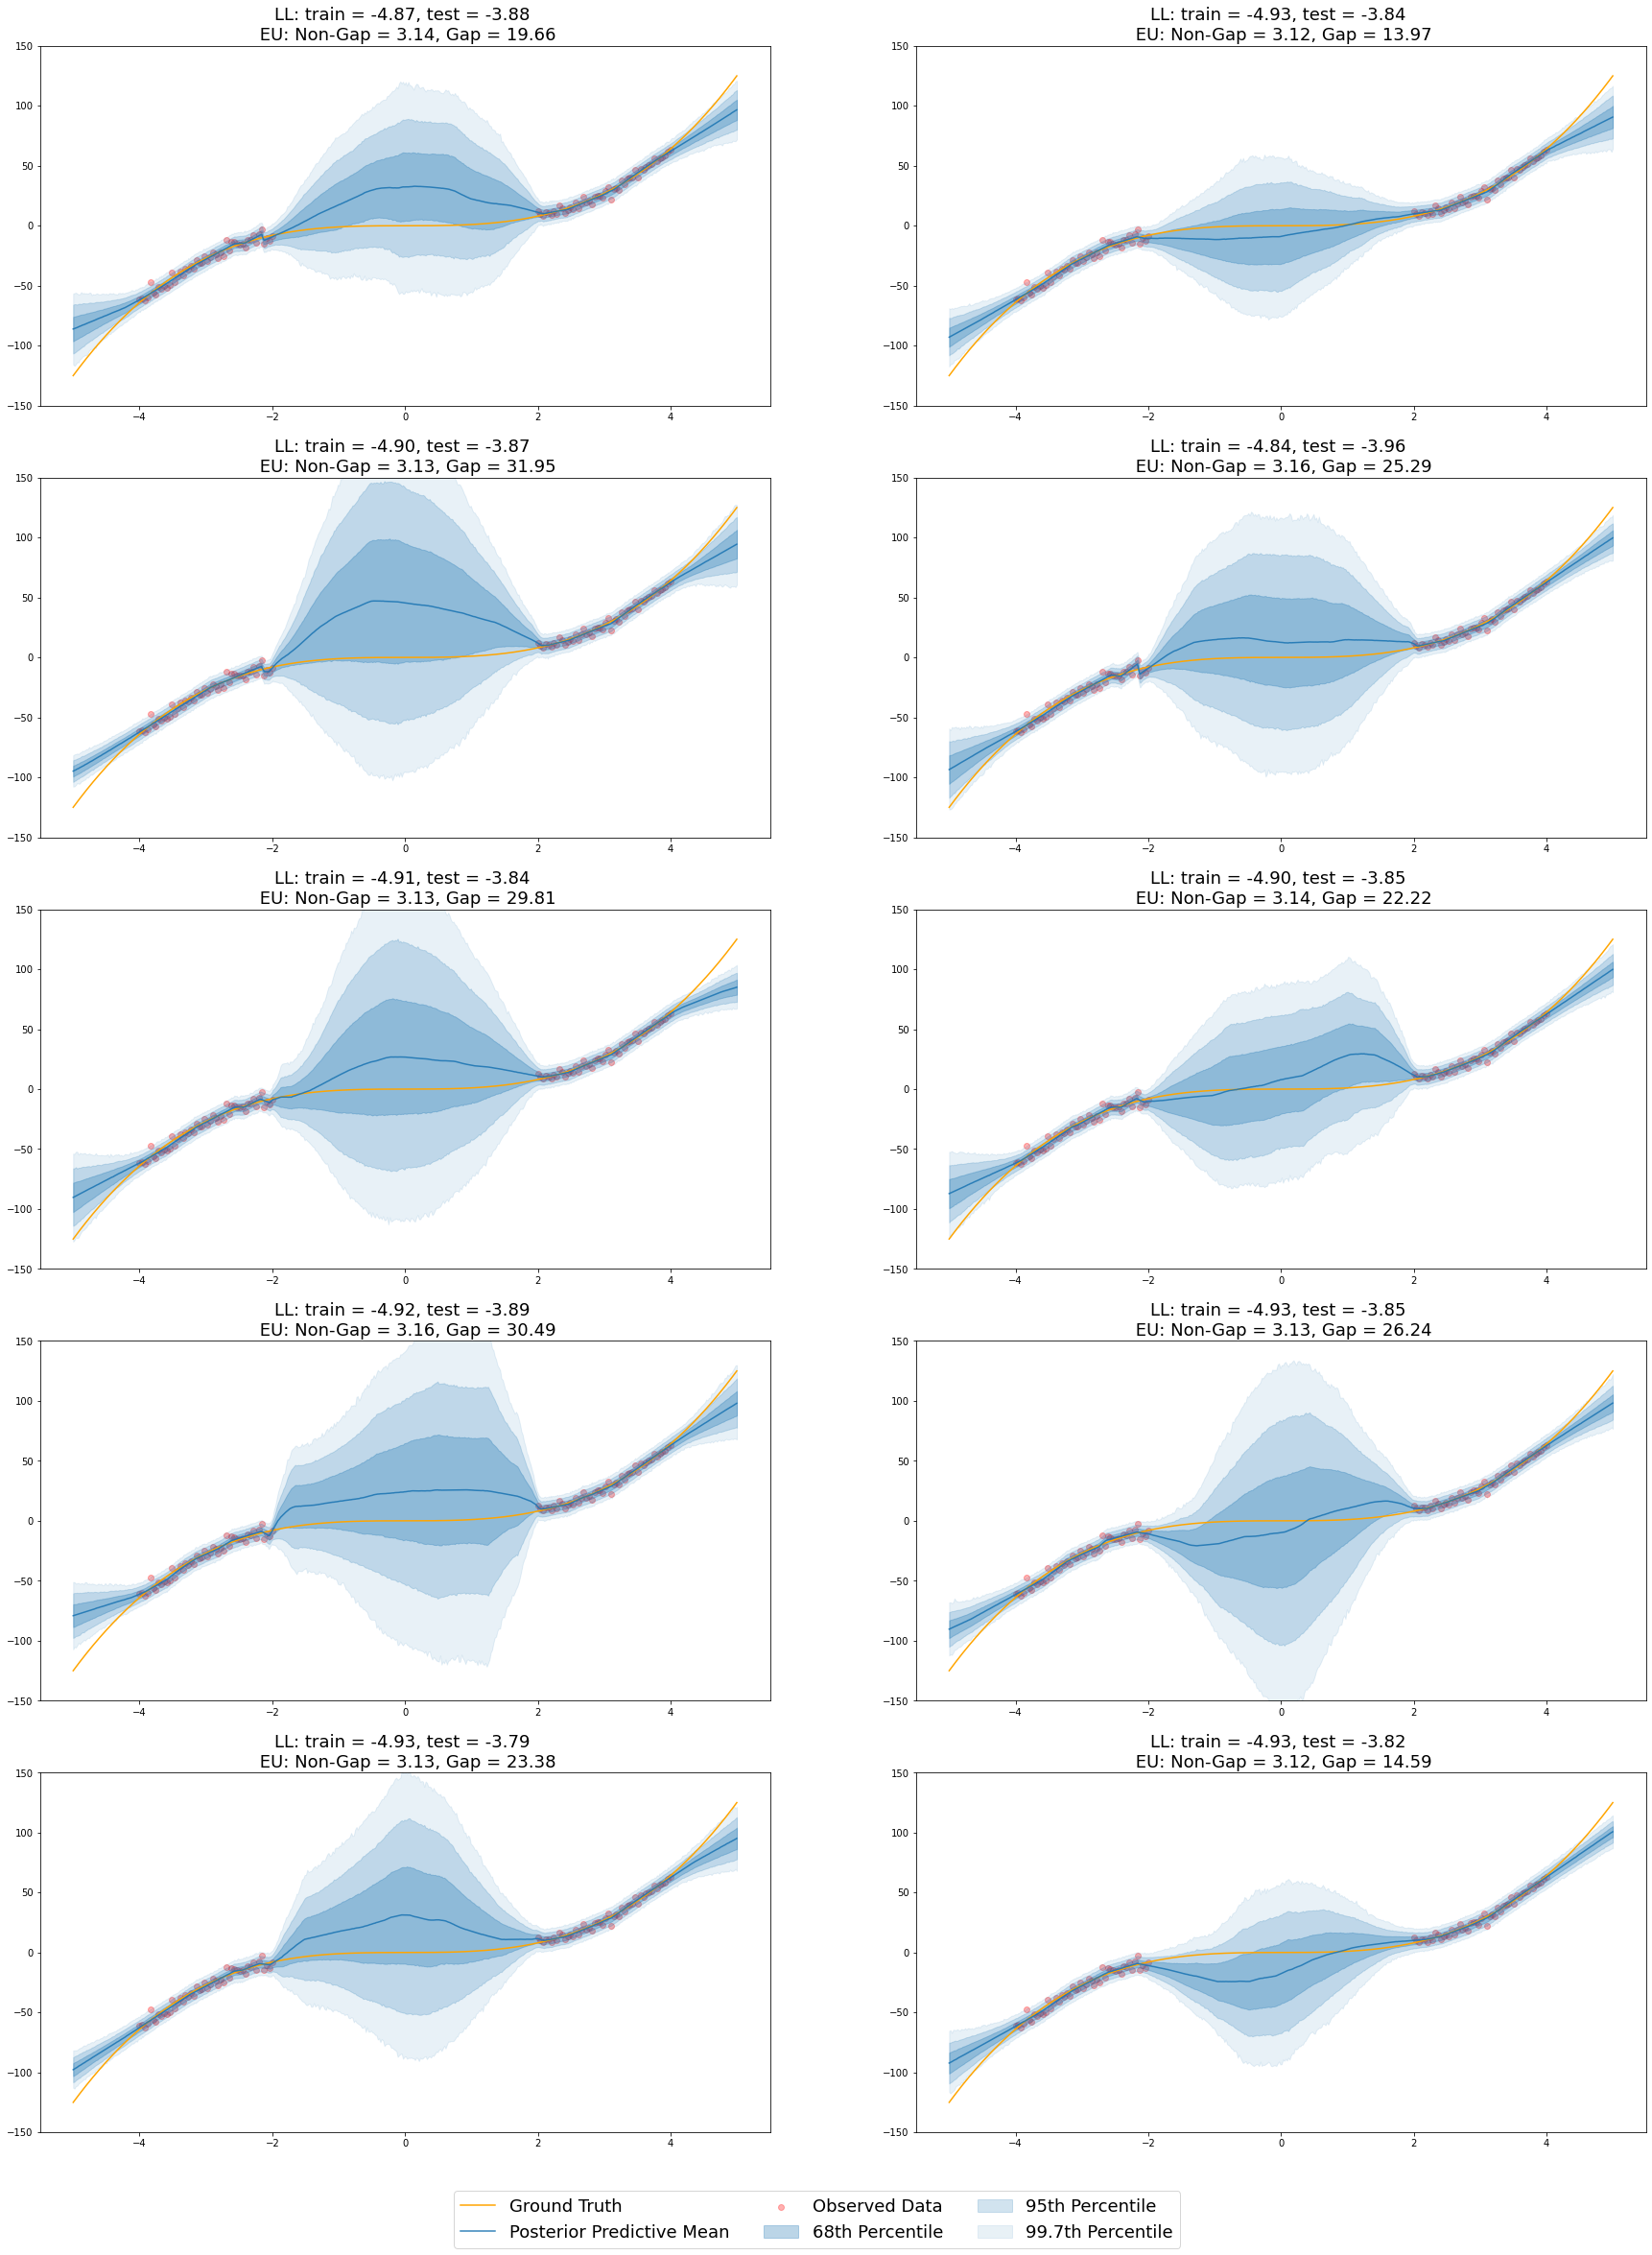

In [13]:
fig, axs = plt.subplots(5, 2, figsize = (30, 40))

for i, ax in enumerate(axs.ravel()):
    nlm = nlms[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior = y_posterior + np.random.normal(0, noise_var**0.5, size=y_posterior.shape)

    # Calculating Percentiles
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_upper2 = np.percentile(y_posterior, 84, axis=0)
    pp_lower2 = np.percentile(y_posterior, 16, axis=0)
    pp_upper3 = np.percentile(y_posterior, 99.85, axis=0)
    pp_lower3 = np.percentile(y_posterior, 0.15, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)

    # Visualizing 68%/95%/99.7% posterior predictive interval of Bayesian polynomial regression
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], y_test[0,:], color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], pp_mean, color='tab:blue', alpha=0.9, label='Posterior Predictive Mean')
    ax.fill_between(x_test[0,:], pp_upper2, pp_lower2, color = 'tab:blue', alpha = 0.3, label="68th Percentile")
    ax.fill_between(x_test[0,:], pp_upper, pp_lower, color='tab:blue', alpha=0.2, label="95th Percentile")
    ax.fill_between(x_test[0,:], pp_upper3, pp_lower3, color = 'tab:blue', alpha = 0.1, label="99.7th Percentile")
        
    ax.set_ylim([-150, 150])
    
    ax.set_title("LL: train = {:.2f}, test = {:.2f} \n EU: Non-Gap = {:.2f}, Gap = {:.2f}".format(lls_train[i], lls_test[i], eus_non_gap[i], eus_gap[i]), fontsize = 18)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor = (0.5, 0.08), fontsize = 18)

plt.show()

All random states give good uncertainty behavior in the gap region. This runs counter to our expectation from the paper. However, below we explain this departure from the paper results. 

### Regularization Parameter = 10

In [6]:
rand_states = np.random.randint(0, 1e5, size = 10)

params['reg_param'] = 10

nlms = []

for r, rand_state in enumerate(rand_states):
    print("Random seed: {}".format(r))
    random = np.random.RandomState(rand_state)
    nn_i = NLM(architecture, random=random)
    nlms.append(nn_i)
    nn_i.fit(x.reshape((1, -1)), y.reshape((1, -1)), params)
    print("")

Random seed: 0
Iteration 0 loss 10820.344048677343; gradient mag: 18394.11778699488
Iteration 100 loss 43.590270267940184; gradient mag: 40.25174164859148
Iteration 200 loss 15.114893909809698; gradient mag: 12.117163399115219
Iteration 300 loss 14.135045009448838; gradient mag: 13.993471843690012
Iteration 400 loss 14.049456900652926; gradient mag: 14.129162580241266
Iteration 500 loss 13.867625064299343; gradient mag: 4.869504881096947
Iteration 600 loss 13.778306692804906; gradient mag: 8.83859397861783
Iteration 700 loss 13.705487523032664; gradient mag: 8.590625156008452
Iteration 800 loss 13.617345986242254; gradient mag: 8.09982673799541
Iteration 900 loss 13.557672248017255; gradient mag: 10.003886506165575
Iteration 1000 loss 13.440191304936217; gradient mag: 25.49383975452766
Iteration 1100 loss 13.363230176555813; gradient mag: 17.32444209544562
Iteration 1200 loss 13.286495183897499; gradient mag: 6.313884709989852
Iteration 1300 loss 13.24900486782856; gradient mag: 24.358

Iteration 1400 loss 13.383060256547576; gradient mag: 5.147613745248013
Iteration 1500 loss 13.315449334384716; gradient mag: 10.834702068313492
Iteration 1600 loss 13.30773743599776; gradient mag: 45.043730726699636
Iteration 1700 loss 13.172738394111544; gradient mag: 4.439045692252564
Iteration 1800 loss 13.12065529575677; gradient mag: 3.3209233356760333
Iteration 1900 loss 13.04890281625768; gradient mag: 4.392978908856023
Iteration 2000 loss 12.997615765660544; gradient mag: 5.996810142455642
Iteration 2100 loss 12.930076307446328; gradient mag: 3.1184209098655935
Iteration 2200 loss 12.861232418238405; gradient mag: 6.882685537651528
Iteration 2300 loss 12.797532060029166; gradient mag: 7.815141010259348
Iteration 2400 loss 12.735071914505996; gradient mag: 4.2743060649655495
Iteration 2500 loss 12.6747347091299; gradient mag: 5.243096459148789
Iteration 2600 loss 12.610956793242336; gradient mag: 11.032850350125418
Iteration 2700 loss 12.556292893521295; gradient mag: 6.7467180

Iteration 2800 loss 12.026054575489823; gradient mag: 4.0104855263724435
Iteration 2900 loss 11.99127806877447; gradient mag: 5.1206631515182375
Iteration 3000 loss 11.94315742776001; gradient mag: 11.130891925536377
Iteration 3100 loss 11.916874111948447; gradient mag: 36.99641279735474
Iteration 3200 loss 11.85332325904276; gradient mag: 20.999451904920974
Iteration 3300 loss 11.793931535404917; gradient mag: 10.74046826717151
Iteration 3400 loss 11.754243465599552; gradient mag: 20.58753313956088
Iteration 3500 loss 11.789774323283009; gradient mag: 47.25515178706247
Iteration 3600 loss 11.65783744952988; gradient mag: 12.585555382099688
Iteration 3700 loss 11.720114999036076; gradient mag: 47.28825610316566
Iteration 3800 loss 11.590457675943695; gradient mag: 25.736640224774007
Iteration 3900 loss 11.525543519475107; gradient mag: 20.075102303178824
Iteration 4000 loss 11.47815270366832; gradient mag: 12.964951202827022
Iteration 4100 loss 11.484138691208708; gradient mag: 29.8645

Iteration 4200 loss 11.539439664601964; gradient mag: 13.528101404762397
Iteration 4300 loss 11.740988562340242; gradient mag: 94.13471913719812
Iteration 4400 loss 11.642006247032498; gradient mag: 86.33244632933217
Iteration 4500 loss 11.37999541222334; gradient mag: 3.65927747191126
Iteration 4600 loss 11.564865912645487; gradient mag: 97.96071406695172
Iteration 4700 loss 11.325984565032579; gradient mag: 42.137431670382284
Iteration 4800 loss 13.0985850152341; gradient mag: 257.1948946797293
Iteration 4900 loss 11.171194006916705; gradient mag: 7.4869998976007075
Iteration 5000 loss 11.193010007347597; gradient mag: 54.03837583464572
Iteration 5100 loss 11.079549126137364; gradient mag: 19.29523142429546
Iteration 5200 loss 11.074901478671018; gradient mag: 42.720709623288116
Iteration 5300 loss 10.994366927671203; gradient mag: 23.44805579275964
Iteration 5400 loss 10.951122855897669; gradient mag: 25.55302663502592
Iteration 5500 loss 10.948539701600739; gradient mag: 45.3227674

Iteration 5600 loss 9.982026449870132; gradient mag: 7.548633959993753
Iteration 5700 loss 9.96635819071372; gradient mag: 20.660622831776568
Iteration 5800 loss 10.4787613293044; gradient mag: 125.79665815934898
Iteration 5900 loss 9.960065763415196; gradient mag: 43.95747138693321
Iteration 6000 loss 10.150091020382694; gradient mag: 90.79389832850988
Iteration 6100 loss 9.85642177900068; gradient mag: 22.785943775247542
Iteration 6200 loss 10.08561838077231; gradient mag: 87.73403302892366
Iteration 6300 loss 9.97857620258994; gradient mag: 59.99462392826322
Iteration 6400 loss 9.792805066972129; gradient mag: 30.600176060791267
Iteration 6500 loss 9.786867660835078; gradient mag: 35.41218507277277
Iteration 6600 loss 9.852610188994149; gradient mag: 64.62561487742705
Iteration 6700 loss 9.77914987941347; gradient mag: 54.49732496059723
Iteration 6800 loss 9.653957168102252; gradient mag: 14.859670442355707
Iteration 6900 loss 11.131288718472154; gradient mag: 190.17645546847166
Ite

Iteration 7100 loss 10.254002382093908; gradient mag: 56.996123956013584
Iteration 7200 loss 10.078073189668963; gradient mag: 12.601560763412762
Iteration 7300 loss 10.272138401786563; gradient mag: 68.91259710403423
Iteration 7400 loss 10.031121063392995; gradient mag: 19.511641049571864
Iteration 7500 loss 9.975187679465007; gradient mag: 4.436995093866284
Iteration 7600 loss 9.951032634079693; gradient mag: 17.969223060766303
Iteration 7700 loss 9.920434134010923; gradient mag: 17.519611262219165
Iteration 7800 loss 9.88308732964574; gradient mag: 9.902607274861607
Iteration 7900 loss 9.85053222110856; gradient mag: 9.172523406465617
Iteration 8000 loss 9.850958694613; gradient mag: 26.140232272744278
Iteration 8100 loss 9.789099146939364; gradient mag: 9.732261614615943
Iteration 8200 loss 9.8633565558579; gradient mag: 43.627648640740006
Iteration 8300 loss 9.79283551924374; gradient mag: 35.034644184346305
Iteration 8400 loss 9.727606856718278; gradient mag: 24.18801933834268
It

Iteration 8500 loss 10.145658106216771; gradient mag: 7.38816513209606
Iteration 8600 loss 10.118227090814962; gradient mag: 12.457673503235435
Iteration 8700 loss 10.218190515595973; gradient mag: 67.37116517887418
Iteration 8800 loss 10.691187867636717; gradient mag: 144.74314952820177
Iteration 8900 loss 11.121073476923721; gradient mag: 170.10274764781934
Iteration 9000 loss 10.016156782019209; gradient mag: 4.973359153482047
Iteration 9100 loss 9.98156163014968; gradient mag: 4.3359795655851565
Iteration 9200 loss 9.98625738734388; gradient mag: 24.086074387786073
Iteration 9300 loss 9.940126958801372; gradient mag: 18.711791272714446
Iteration 9400 loss 9.905313388980087; gradient mag: 5.071109139857496
Iteration 9500 loss 9.878213361480103; gradient mag: 6.27292544526652
Iteration 9600 loss 9.850276384600292; gradient mag: 5.673124756544817
Iteration 9700 loss 9.873541706182092; gradient mag: 37.71958295493027
Iteration 9800 loss 9.863736827647493; gradient mag: 45.6752829941379

Iteration 9900 loss 9.649734817261772; gradient mag: 5.106357842365012

Random seed: 8
Iteration 0 loss 16483.197322505504; gradient mag: 23973.1032292265
Iteration 100 loss 59.63212652385403; gradient mag: 94.27924848898763
Iteration 200 loss 19.226654923633944; gradient mag: 13.775804035866582
Iteration 300 loss 16.806176177372087; gradient mag: 13.987112114652763
Iteration 400 loss 14.834136876850447; gradient mag: 22.386824124698187
Iteration 500 loss 14.36197925894045; gradient mag: 26.75872607681349
Iteration 600 loss 14.210556798165921; gradient mag: 9.627173662050604
Iteration 700 loss 14.09568155946177; gradient mag: 5.44229633470935
Iteration 800 loss 13.989661554825254; gradient mag: 9.4794484379334
Iteration 900 loss 13.935370917338197; gradient mag: 24.51245105206344
Iteration 1000 loss 13.865802190373644; gradient mag: 8.331654547010656
Iteration 1100 loss 13.806111387277774; gradient mag: 10.39933986226471
Iteration 1200 loss 13.745117308651793; gradient mag: 3.997316428

Iteration 1300 loss 13.481373149573905; gradient mag: 10.689090268564415
Iteration 1400 loss 13.397333983391945; gradient mag: 27.25183304194649
Iteration 1500 loss 13.290211455677825; gradient mag: 8.680220749653328
Iteration 1600 loss 13.204441936189902; gradient mag: 13.128647534645252
Iteration 1700 loss 13.12149655421823; gradient mag: 23.700655609449115
Iteration 1800 loss 13.03899998898747; gradient mag: 33.55982135819979
Iteration 1900 loss 13.001164097915305; gradient mag: 57.713823260620856
Iteration 2000 loss 13.05134928628879; gradient mag: 100.34682779351789
Iteration 2100 loss 12.910199378055589; gradient mag: 73.83679048869514
Iteration 2200 loss 12.690062917763086; gradient mag: 12.650424703739375
Iteration 2300 loss 12.623371275987044; gradient mag: 16.6156445724414
Iteration 2400 loss 12.537595456374195; gradient mag: 14.236567727075919
Iteration 2500 loss 12.454280166656785; gradient mag: 24.90993155455757
Iteration 2600 loss 12.385090410454774; gradient mag: 31.3982

In [7]:
# Compute neg_log_likelihood and epistemic uncertainty on test data (gap vs. non-gap)
gap_idx = np.logical_and(x_test > -2, x_test < 2)
x_test_gap = x_test[gap_idx].reshape(1,-1)
y_test_gap = x_test_gap**3

non_gap_idx = np.logical_or(np.logical_and(x_test > -4, x_test < -2),np.logical_and(x_test > 2, x_test < 4))
x_test_non_gap = x_test[non_gap_idx].reshape(1,-1)
y_test_non_gap = x_test_non_gap**3

lls_train = []
eus_gap = []
lls_test = []
eus_non_gap = []

for nlm in nlms:
    posterior_predictive_train = nlm.get_posterior_preds(x, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    posterior_predictive_train = posterior_predictive_train + np.random.normal(0, noise_var**0.5, size=posterior_predictive_train.shape)

    posterior_predictive_gap = nlm.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    posterior_predictive_gap = posterior_predictive_gap + np.random.normal(0, noise_var**0.5, size=posterior_predictive_gap.shape)
    
    posterior_predictive_non_gap = nlm.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    posterior_predictive_non_gap = posterior_predictive_non_gap + np.random.normal(0, noise_var**0.5, size=posterior_predictive_non_gap.shape)

    lls_train.append(neg_log_likelihood(posterior_predictive_train, y, noise_var) * -1)
    lls_test.append(neg_log_likelihood(posterior_predictive_non_gap, y_test_non_gap, noise_var) * -1)
    
    eus_gap.append(epistemic_uncertainty(posterior_predictive_gap))
    eus_non_gap.append(epistemic_uncertainty(posterior_predictive_non_gap))

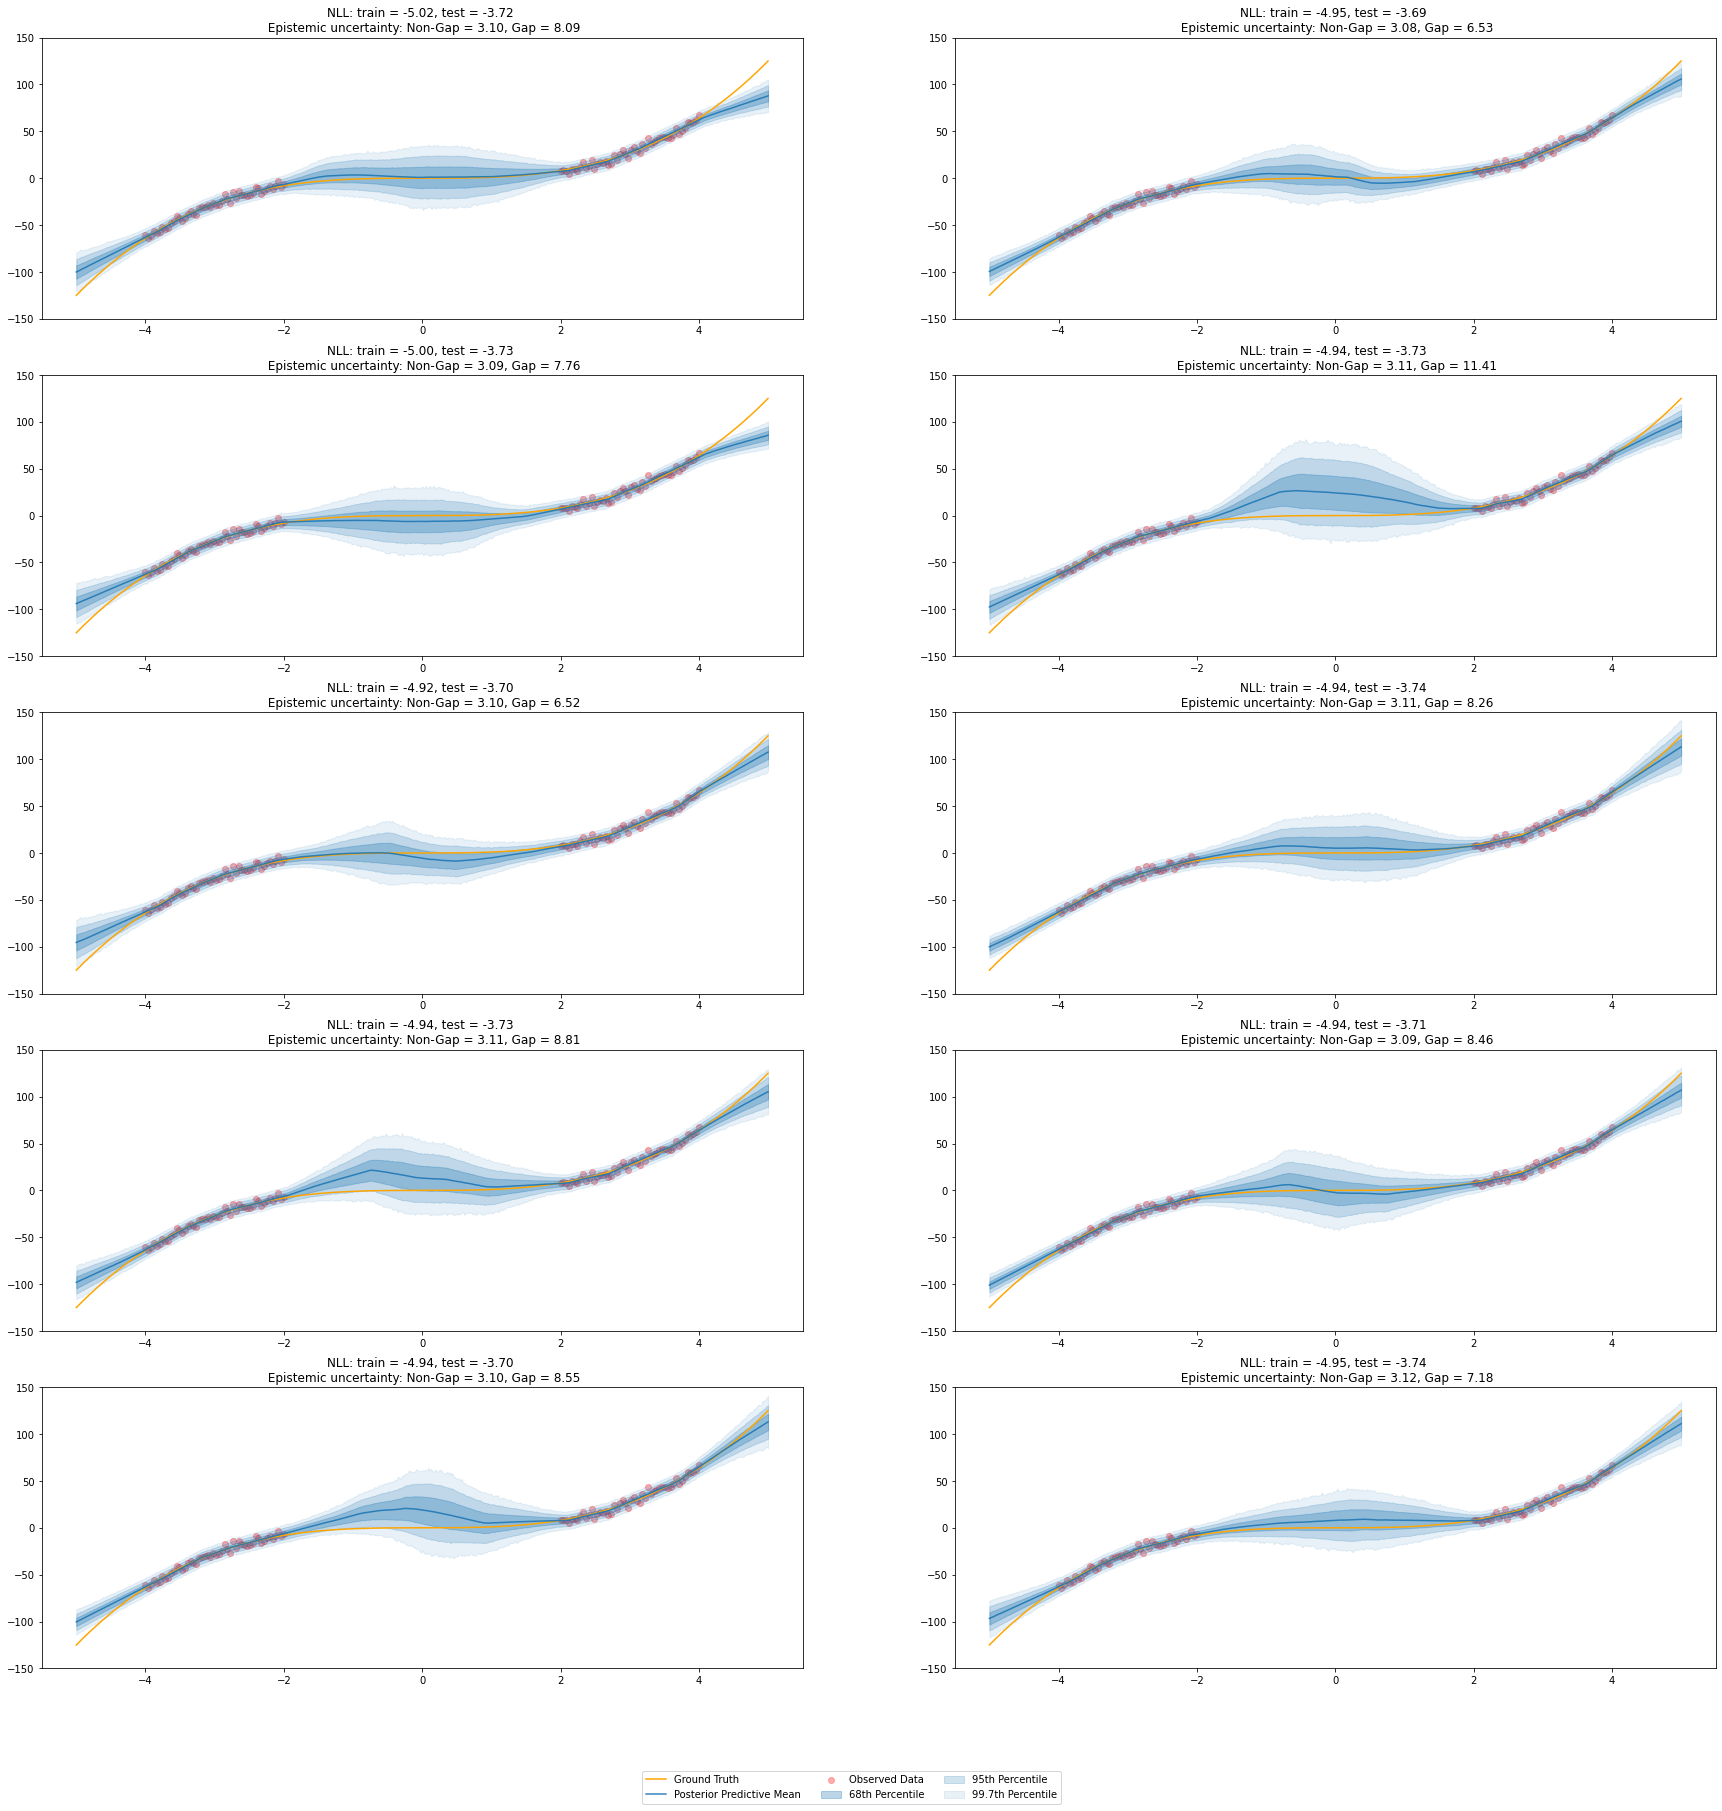

In [9]:
fig, axs = plt.subplots(5, 2, figsize = (30, 30))

for i, ax in enumerate(axs.ravel()):
    nlm = nlms[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior = y_posterior + np.random.normal(0, noise_var**0.5, size=y_posterior.shape)

    # Calculating Percentiles
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_upper2 = np.percentile(y_posterior, 84, axis=0)
    pp_lower2 = np.percentile(y_posterior, 16, axis=0)
    pp_upper3 = np.percentile(y_posterior, 99.85, axis=0)
    pp_lower3 = np.percentile(y_posterior, 0.15, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)

    # Visualizing 68%/95%/99.7% posterior predictive interval of Bayesian polynomial regression
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], y_test[0,:], color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], pp_mean, color='tab:blue', alpha=0.9, label='Posterior Predictive Mean')
    ax.fill_between(x_test[0,:], pp_upper2, pp_lower2, color = 'tab:blue', alpha = 0.3, label="68th Percentile")
    ax.fill_between(x_test[0,:], pp_upper, pp_lower, color='tab:blue', alpha=0.2, label="95th Percentile")
    ax.fill_between(x_test[0,:], pp_upper3, pp_lower3, color = 'tab:blue', alpha = 0.1, label="99.7th Percentile")
        
    ax.set_ylim([-150, 150])
    
    ax.set_title("LL: train = {:.2f}, test = {:.2f} \n EU: Non-Gap = {:.2f}, Gap = {:.2f}".format(lls_train[i], lls_test[i], eus_non_gap[i], eus_gap[i]), fontsize = 18)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor = (0.5, 0.08), fontsize = 18)

plt.show()

All random starts are still giving good uncertainty behavior, although certainly less uncertainty than with no regularization. 

### Regularization Parameter: 50

In [6]:
rand_states = np.random.randint(0, 1e5, size = 10)

params['reg_param'] = 50

nlms = []

for r, rand_state in enumerate(rand_states):
    print("Random seed: {}".format(r))
    random = np.random.RandomState(rand_state)
    nn_i = NLM(architecture, random=random)
    nlms.append(nn_i)
    nn_i.fit(x.reshape((1, -1)), y.reshape((1, -1)), params)
    print("")

Random seed: 0
Iteration 0 loss 587.2670942510384; gradient mag: 2677.8494387905644
Iteration 100 loss 40.03470901666036; gradient mag: 10.199204994056212
Iteration 200 loss 32.31092943127351; gradient mag: 8.870347145016275
Iteration 300 loss 29.31038656359352; gradient mag: 30.37393867522547
Iteration 400 loss 27.215234221009318; gradient mag: 9.119823246919507
Iteration 500 loss 25.517887431333907; gradient mag: 6.826573448090918
Iteration 600 loss 24.07507388772722; gradient mag: 7.765805976261889
Iteration 700 loss 22.79804927341603; gradient mag: 7.405838065325602
Iteration 800 loss 21.65616120300719; gradient mag: 3.5396534934817967
Iteration 900 loss 20.660233622529866; gradient mag: 15.671572204907761
Iteration 1000 loss 19.756034953784933; gradient mag: 9.817321479127115
Iteration 1100 loss 18.957842936477014; gradient mag: 18.944407760834295
Iteration 1200 loss 18.226145583464312; gradient mag: 28.448595544968708
Iteration 1300 loss 17.723378627184612; gradient mag: 73.55760

Iteration 1500 loss 22.789657555175246; gradient mag: 14.386692364332822
Iteration 1600 loss 22.315073036627588; gradient mag: 76.40309919805767
Iteration 1700 loss 21.66739346918439; gradient mag: 60.72365840481315
Iteration 1800 loss 21.2535355262438; gradient mag: 57.82809565781615
Iteration 1900 loss 20.563404565722653; gradient mag: 3.843394974232232
Iteration 2000 loss 20.09748740083479; gradient mag: 3.5356519871996435
Iteration 2100 loss 19.64612882305481; gradient mag: 2.6906796554394266
Iteration 2200 loss 19.211987987204548; gradient mag: 5.216278477409157
Iteration 2300 loss 18.791800598863034; gradient mag: 5.458569430317185
Iteration 2400 loss 18.396546221226544; gradient mag: 19.958854510009584
Iteration 2500 loss 17.992089707991006; gradient mag: 10.070359080637596
Iteration 2600 loss 18.028016931115367; gradient mag: 124.08378481788078
Iteration 2700 loss 17.263716839526754; gradient mag: 20.55208182585883
Iteration 2800 loss 16.963224108790282; gradient mag: 42.574797

Iteration 2900 loss 20.91609848723143; gradient mag: 11.607335318614062
Iteration 3000 loss 20.48479950433446; gradient mag: 4.313391856309383
Iteration 3100 loss 20.085678392791333; gradient mag: 4.863971246959968
Iteration 3200 loss 19.685651057477457; gradient mag: 12.662618486557369
Iteration 3300 loss 19.324450838289653; gradient mag: 14.63000265482954
Iteration 3400 loss 18.92206724779099; gradient mag: 8.0319557529328
Iteration 3500 loss 18.622225116958543; gradient mag: 32.19039579599909
Iteration 3600 loss 18.215354336243152; gradient mag: 10.475791589528054
Iteration 3700 loss 17.869170909033038; gradient mag: 5.605777154709748
Iteration 3800 loss 17.54395118453217; gradient mag: 12.356809685165222
Iteration 3900 loss 17.21162299028767; gradient mag: 7.903213790187859
Iteration 4000 loss 16.898497518464545; gradient mag: 4.8372252953803745
Iteration 4100 loss 16.59949351118849; gradient mag: 4.609799581667039
Iteration 4200 loss 16.317919494204997; gradient mag: 15.3517471866

Iteration 4300 loss 16.03218716720522; gradient mag: 15.01743225123335
Iteration 4400 loss 15.762214779315098; gradient mag: 7.311298018888892
Iteration 4500 loss 15.509096474913424; gradient mag: 5.080562139718107
Iteration 4600 loss 15.288540989781312; gradient mag: 23.79749202449032
Iteration 4700 loss 15.073199962543658; gradient mag: 31.333987509836753
Iteration 4800 loss 14.803020505144355; gradient mag: 15.863683765889885
Iteration 4900 loss 14.586533649791644; gradient mag: 25.127163792215562
Iteration 5000 loss 14.36334171928894; gradient mag: 19.84978360561385
Iteration 5100 loss 14.14491528381402; gradient mag: 8.378391965841427
Iteration 5200 loss 14.109858448027584; gradient mag: 63.10365642626559
Iteration 5300 loss 13.747819547600574; gradient mag: 9.389818567194915
Iteration 5400 loss 13.619807268030794; gradient mag: 39.457005043704925
Iteration 5500 loss 13.488417893674445; gradient mag: 54.5991418484086
Iteration 5600 loss 13.250880387878233; gradient mag: 32.5335989

Iteration 5700 loss 12.416445643781334; gradient mag: 3.3795915549445543
Iteration 5800 loss 12.245249975137405; gradient mag: 5.0169585184246275
Iteration 5900 loss 12.192756090284202; gradient mag: 38.55585655837204
Iteration 6000 loss 11.96340125217017; gradient mag: 12.620538264114437
Iteration 6100 loss 11.871965130761094; gradient mag: 29.459751274657446
Iteration 6200 loss 11.69366101212293; gradient mag: 14.578465620728396
Iteration 6300 loss 11.550892314900942; gradient mag: 3.8751056935257386
Iteration 6400 loss 11.485316935087068; gradient mag: 28.540709712749777
Iteration 6500 loss 11.334718804864899; gradient mag: 12.359199912687272
Iteration 6600 loss 11.208866048685568; gradient mag: 7.392165916685107
Iteration 6700 loss 11.21197847853119; gradient mag: 38.05038508530667
Iteration 6800 loss 11.057458883367627; gradient mag: 26.337380142075347
Iteration 6900 loss 11.006627884637938; gradient mag: 34.6785244621599
Iteration 7000 loss 10.977270122244807; gradient mag: 37.86

Iteration 7100 loss 14.796476884514373; gradient mag: 204.58204812095568
Iteration 7200 loss 11.226383890701452; gradient mag: 2.9355390937541634
Iteration 7300 loss 11.12289612841453; gradient mag: 3.84044654359074
Iteration 7400 loss 11.048743818440052; gradient mag: 17.969314207264468
Iteration 7500 loss 10.935395372370689; gradient mag: 2.900373596745427
Iteration 7600 loss 10.860340626906343; gradient mag: 3.1315903011578965
Iteration 7700 loss 10.77858637745976; gradient mag: 2.924567375392198
Iteration 7800 loss 10.700501900153814; gradient mag: 4.774545990004521
Iteration 7900 loss 10.642671340372004; gradient mag: 12.505473092474196
Iteration 8000 loss 10.638908859197487; gradient mag: 28.130524511805717
Iteration 8100 loss 10.512477884473764; gradient mag: 6.515842288409404
Iteration 8200 loss 10.4484827780675; gradient mag: 3.13866009994215
Iteration 8300 loss 10.397207733372275; gradient mag: 7.044450059624705
Iteration 8400 loss 10.345686858151849; gradient mag: 9.10923541

Iteration 8500 loss 10.536859186132416; gradient mag: 11.242537442704215
Iteration 8600 loss 10.468593388511042; gradient mag: 3.377354110500123
Iteration 8700 loss 10.421371956590447; gradient mag: 10.771566037266041
Iteration 8800 loss 10.365418446055287; gradient mag: 10.74370387765395
Iteration 8900 loss 10.322937249703724; gradient mag: 13.072872828441486
Iteration 9000 loss 10.282674366954717; gradient mag: 15.19106956012143
Iteration 9100 loss 10.229489823998023; gradient mag: 12.268024888230755
Iteration 9200 loss 10.187847295390792; gradient mag: 14.156166148463793
Iteration 9300 loss 10.135976860248096; gradient mag: 7.267869168177857
Iteration 9400 loss 10.094067362878766; gradient mag: 3.6509533758043307
Iteration 9500 loss 10.094343043709848; gradient mag: 20.038142699762577
Iteration 9600 loss 10.223942125235242; gradient mag: 47.01169837691846
Iteration 9700 loss 9.989687460397356; gradient mag: 2.13795887861302
Iteration 9800 loss 9.984742599764651; gradient mag: 17.474

Iteration 9900 loss 9.921416553704413; gradient mag: 17.183047761675493

Random seed: 8
Iteration 0 loss 4994.227052356993; gradient mag: 11769.688770556642
Iteration 100 loss 51.253898431138055; gradient mag: 39.87351580079543
Iteration 200 loss 38.36599706744133; gradient mag: 5.87837264639835
Iteration 300 loss 36.169388614264925; gradient mag: 21.833319412799927
Iteration 400 loss 34.865315350230304; gradient mag: 12.335166894877966
Iteration 500 loss 33.71935659040124; gradient mag: 15.856250661949446
Iteration 600 loss 32.77612828474891; gradient mag: 42.556650192931286
Iteration 700 loss 31.875914653859834; gradient mag: 3.4036763115276334
Iteration 800 loss 31.059515439723143; gradient mag: 8.637731518879956
Iteration 900 loss 30.272243421988428; gradient mag: 5.703921971535217
Iteration 1000 loss 29.529537366251056; gradient mag: 8.113631718298619
Iteration 1100 loss 28.81115248538966; gradient mag: 5.6995018324834055
Iteration 1200 loss 28.12078502096519; gradient mag: 10.564

Iteration 1300 loss 24.784848027616086; gradient mag: 10.944410569060325
Iteration 1400 loss 24.114399864908748; gradient mag: 12.116835399131235
Iteration 1500 loss 23.78110290103556; gradient mag: 16.812305819539002
Iteration 1600 loss 23.101352318185054; gradient mag: 1.4321261031795514
Iteration 1700 loss 22.51362315573808; gradient mag: 1.4682851588254373
Iteration 1800 loss 21.962755474579644; gradient mag: 4.7020372941518636
Iteration 1900 loss 21.41878606127535; gradient mag: 2.506688548047071
Iteration 2000 loss 20.920756982819952; gradient mag: 4.426226550423376
Iteration 2100 loss 20.44905187911081; gradient mag: 4.299150442215803
Iteration 2200 loss 19.995274526556393; gradient mag: 6.436571464727937
Iteration 2300 loss 19.553603201959096; gradient mag: 11.847562801038361
Iteration 2400 loss 19.132808188120958; gradient mag: 18.430256122523993
Iteration 2500 loss 18.68115256822388; gradient mag: 6.512629119332907
Iteration 2600 loss 18.258792220607894; gradient mag: 4.08851

In [7]:
# Compute neg_log_likelihood and epistemic uncertainty on test data (gap vs. non-gap)
gap_idx = np.logical_and(x_test > -2, x_test < 2)
x_test_gap = x_test[gap_idx].reshape(1,-1)
y_test_gap = x_test_gap**3

non_gap_idx = np.logical_or(np.logical_and(x_test > -4, x_test < -2),np.logical_and(x_test > 2, x_test < 4))
x_test_non_gap = x_test[non_gap_idx].reshape(1,-1)
y_test_non_gap = x_test_non_gap**3

lls_train = []
eus_gap = []
lls_test = []
eus_non_gap = []

for nlm in nlms:
    posterior_predictive_train = nlm.get_posterior_preds(x, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    posterior_predictive_train = posterior_predictive_train + np.random.normal(0, noise_var**0.5, size=posterior_predictive_train.shape)

    posterior_predictive_gap = nlm.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    posterior_predictive_gap = posterior_predictive_gap + np.random.normal(0, noise_var**0.5, size=posterior_predictive_gap.shape)
    
    posterior_predictive_non_gap = nlm.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    posterior_predictive_non_gap = posterior_predictive_non_gap + np.random.normal(0, noise_var**0.5, size=posterior_predictive_non_gap.shape)

    lls_train.append(neg_log_likelihood(posterior_predictive_train, y, noise_var) * -1)
    lls_test.append(neg_log_likelihood(posterior_predictive_non_gap, y_test_non_gap, noise_var) * -1)
    
    eus_gap.append(epistemic_uncertainty(posterior_predictive_gap))
    eus_non_gap.append(epistemic_uncertainty(posterior_predictive_non_gap))

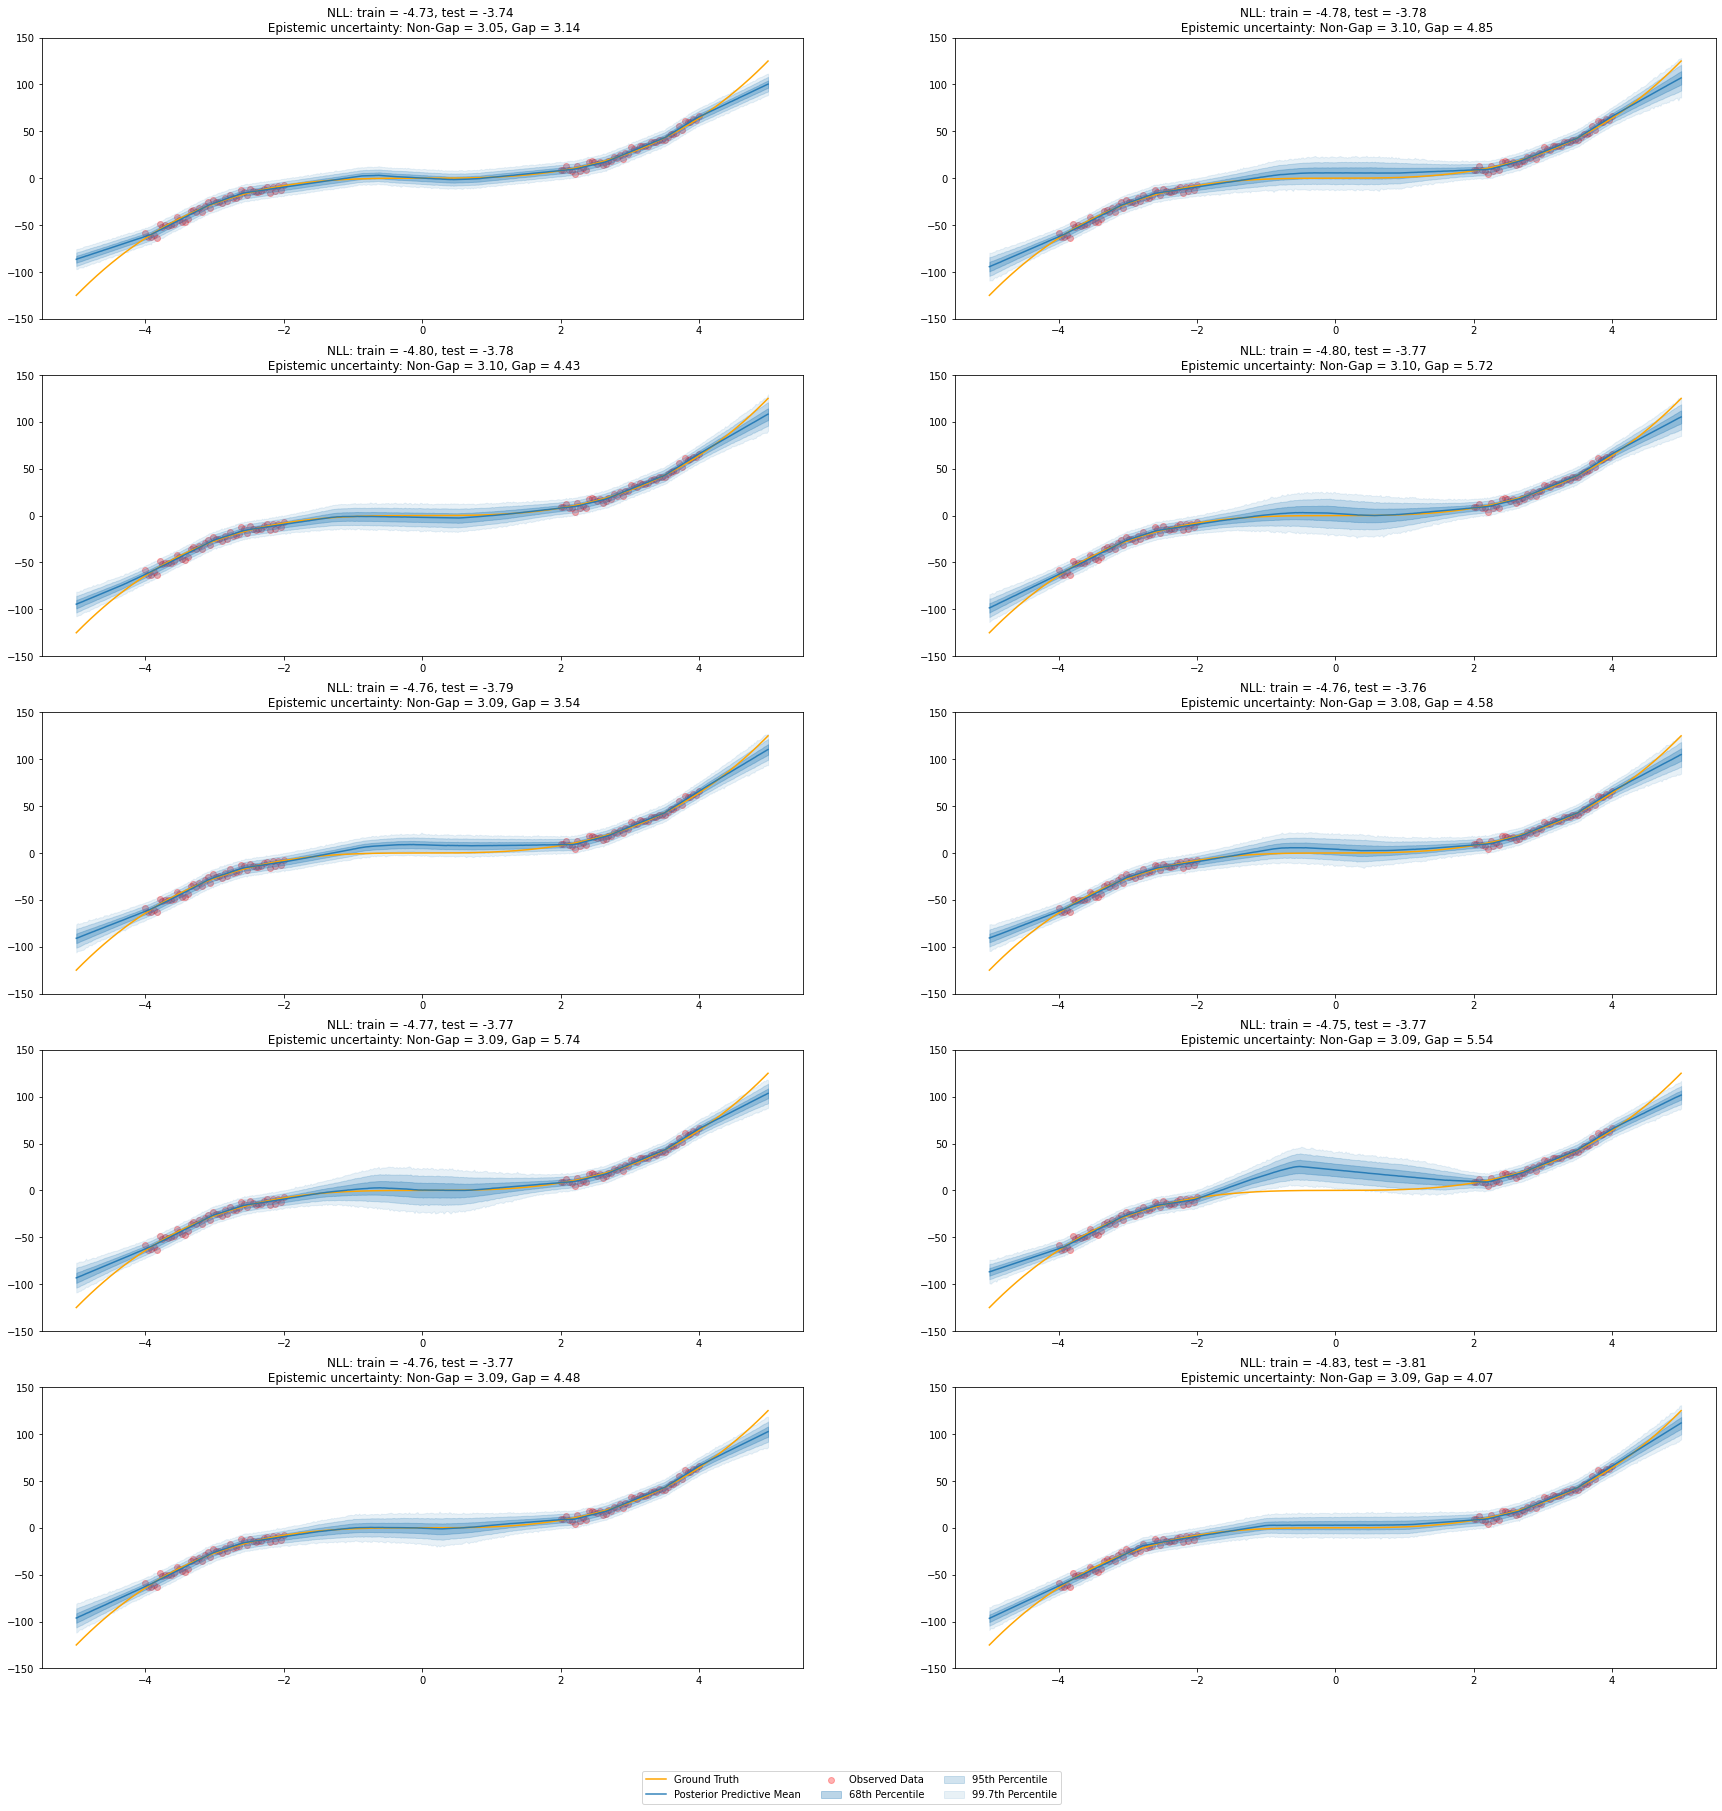

In [8]:
fig, axs = plt.subplots(5, 2, figsize = (30, 30))

for i, ax in enumerate(axs.ravel()):
    nlm = nlms[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior = y_posterior + np.random.normal(0, noise_var**0.5, size=y_posterior.shape)

    # Calculating Percentiles
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_upper2 = np.percentile(y_posterior, 84, axis=0)
    pp_lower2 = np.percentile(y_posterior, 16, axis=0)
    pp_upper3 = np.percentile(y_posterior, 99.85, axis=0)
    pp_lower3 = np.percentile(y_posterior, 0.15, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)

    # Visualizing 68%/95%/99.7% posterior predictive interval of Bayesian polynomial regression
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], y_test[0,:], color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], pp_mean, color='tab:blue', alpha=0.9, label='Posterior Predictive Mean')
    ax.fill_between(x_test[0,:], pp_upper2, pp_lower2, color = 'tab:blue', alpha = 0.3, label="68th Percentile")
    ax.fill_between(x_test[0,:], pp_upper, pp_lower, color='tab:blue', alpha=0.2, label="95th Percentile")
    ax.fill_between(x_test[0,:], pp_upper3, pp_lower3, color = 'tab:blue', alpha = 0.1, label="99.7th Percentile")
        
    ax.set_ylim([-150, 150])
    
    ax.set_title("LL: train = {:.2f}, test = {:.2f} \n EU: Non-Gap = {:.2f}, Gap = {:.2f}".format(lls_train[i], lls_test[i], eus_non_gap[i], eus_gap[i]), fontsize = 18)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor = (0.5, 0.08), fontsize = 18)

plt.show()

Now we start to see how NLMs can give inconsistent uncertainty behaviors. Only 3 of the 10 models give good uncertainty behavior in the gap region. 

## Prior Variance

### Regularization = 0 

In [5]:
rand_states = np.random.randint(0, 1e5, size = 5)

params['reg_param'] = 0

nlms = []

for r, rand_state in enumerate(rand_states):
    print("Random seed: {}".format(r))
    random = np.random.RandomState(rand_state)
    nn_i = NLM(architecture, random=random)
    nlms.append(nn_i)
    nn_i.fit(x.reshape((1, -1)), y.reshape((1, -1)), params)
    print("")

Random seed: 0
Iteration 0 loss 7165.810846371685; gradient mag: 15705.12535671038
Iteration 100 loss 29.351898053421273; gradient mag: 55.44748736864664
Iteration 200 loss 18.486448039375176; gradient mag: 9.151887627305673
Iteration 300 loss 16.087736632182942; gradient mag: 7.3070615807874555
Iteration 400 loss 14.778691102267011; gradient mag: 8.171275887976856
Iteration 500 loss 13.933519572467379; gradient mag: 6.2935329853256
Iteration 600 loss 13.209266975896151; gradient mag: 5.059138790898441
Iteration 700 loss 12.198196821388665; gradient mag: 3.8597282641478246
Iteration 800 loss 11.817968630774283; gradient mag: 1.9274551296676607
Iteration 900 loss 11.698663428602545; gradient mag: 6.965531156949716
Iteration 1000 loss 11.584646159983754; gradient mag: 10.643636613957591
Iteration 1100 loss 11.523820884155874; gradient mag: 2.959744178237375
Iteration 1200 loss 11.493020999203068; gradient mag: 5.224894617098407
Iteration 1300 loss 11.463740336738; gradient mag: 2.9275258

Iteration 1400 loss 11.34945500065711; gradient mag: 0.9359264928193682
Iteration 1500 loss 11.348730005624565; gradient mag: 0.7146980963457735
Iteration 1600 loss 11.348148972688875; gradient mag: 1.0556269305413601
Iteration 1700 loss 11.347830943196096; gradient mag: 0.9384720326075828
Iteration 1800 loss 11.347153672891029; gradient mag: 0.621726197028456
Iteration 1900 loss 11.346851871029456; gradient mag: 1.5689044464382522
Iteration 2000 loss 11.346146192974654; gradient mag: 0.6326224481860608
Iteration 2100 loss 11.346135650424856; gradient mag: 1.5097422564001957
Iteration 2200 loss 11.345471751764878; gradient mag: 1.2625028467048518
Iteration 2300 loss 11.360749309467803; gradient mag: 25.11052228359326
Iteration 2400 loss 11.36560445208725; gradient mag: 29.311979972074013
Iteration 2500 loss 11.344314314447818; gradient mag: 3.4270198923524084
Iteration 2600 loss 11.349043469747823; gradient mag: 14.500750695151373
Iteration 2700 loss 11.358031065353765; gradient mag: 2

Iteration 2800 loss 11.40780995503741; gradient mag: 6.519451440074248
Iteration 2900 loss 11.408753552060706; gradient mag: 9.551816038867816
Iteration 3000 loss 11.437251498302794; gradient mag: 27.745502347615755
Iteration 3100 loss 11.425049895125339; gradient mag: 22.78350759695257
Iteration 3200 loss 11.402656202355155; gradient mag: 4.280456999728908
Iteration 3300 loss 11.408552694568412; gradient mag: 13.43985302763934
Iteration 3400 loss 11.570971376667835; gradient mag: 62.71805933165949
Iteration 3500 loss 11.41118806073032; gradient mag: 17.408855430746875
Iteration 3600 loss 11.39898188992438; gradient mag: 8.571554958183393
Iteration 3700 loss 11.395951219472881; gradient mag: 6.0422797007498845
Iteration 3800 loss 11.412689043291955; gradient mag: 21.238027010249876
Iteration 3900 loss 11.391085619157177; gradient mag: 4.558747511546569
Iteration 4000 loss 11.367999825707216; gradient mag: 31.362342060118067
Iteration 4100 loss 11.297376104272269; gradient mag: 22.76453

Iteration 4200 loss 11.313833184177309; gradient mag: 7.954241708091497
Iteration 4300 loss 11.322611191250793; gradient mag: 28.29581432462236
Iteration 4400 loss 12.17740516122949; gradient mag: 229.58826418335335
Iteration 4500 loss 11.452418300766665; gradient mag: 95.05229298376706
Iteration 4600 loss 11.42104077432981; gradient mag: 79.93017656437102
Iteration 4700 loss 11.325728203119176; gradient mag: 25.079760756068385
Iteration 4800 loss 11.345491256790927; gradient mag: 45.93202934793543
Iteration 4900 loss 11.826436171513931; gradient mag: 77.3895299727613
Iteration 5000 loss 11.317126356380145; gradient mag: 7.878017516861401
Iteration 5100 loss 11.313629254725607; gradient mag: 5.7750752131649215
Iteration 5200 loss 11.309607564178908; gradient mag: 8.927031784950586
Iteration 5300 loss 11.308046884281248; gradient mag: 7.222986951678887
Iteration 5400 loss 11.682223857770785; gradient mag: 139.63948891600035
Iteration 5500 loss 11.325700056886046; gradient mag: 30.675864

Iteration 5600 loss 11.563320719544333; gradient mag: 66.10682631554288
Iteration 5700 loss 11.516066679035523; gradient mag: 53.62399054755181
Iteration 5800 loss 11.909164168477997; gradient mag: 123.35707090340635
Iteration 5900 loss 11.506908143092502; gradient mag: 50.812022282506085
Iteration 6000 loss 11.424782888912294; gradient mag: 8.324442947599836
Iteration 6100 loss 11.438193422198998; gradient mag: 20.489067510358367
Iteration 6200 loss 11.403894101801898; gradient mag: 22.13004648571238
Iteration 6300 loss 11.40957875518815; gradient mag: 68.0258060625884
Iteration 6400 loss 11.293976115375498; gradient mag: 46.86718689640725
Iteration 6500 loss 11.335566850884707; gradient mag: 62.50021751387413
Iteration 6600 loss 11.208080154404424; gradient mag: 21.59677494374196
Iteration 6700 loss 11.194097376321313; gradient mag: 13.89272160370037
Iteration 6800 loss 11.181715632277934; gradient mag: 11.592546628203229
Iteration 6900 loss 11.01374554375513; gradient mag: 6.6815399

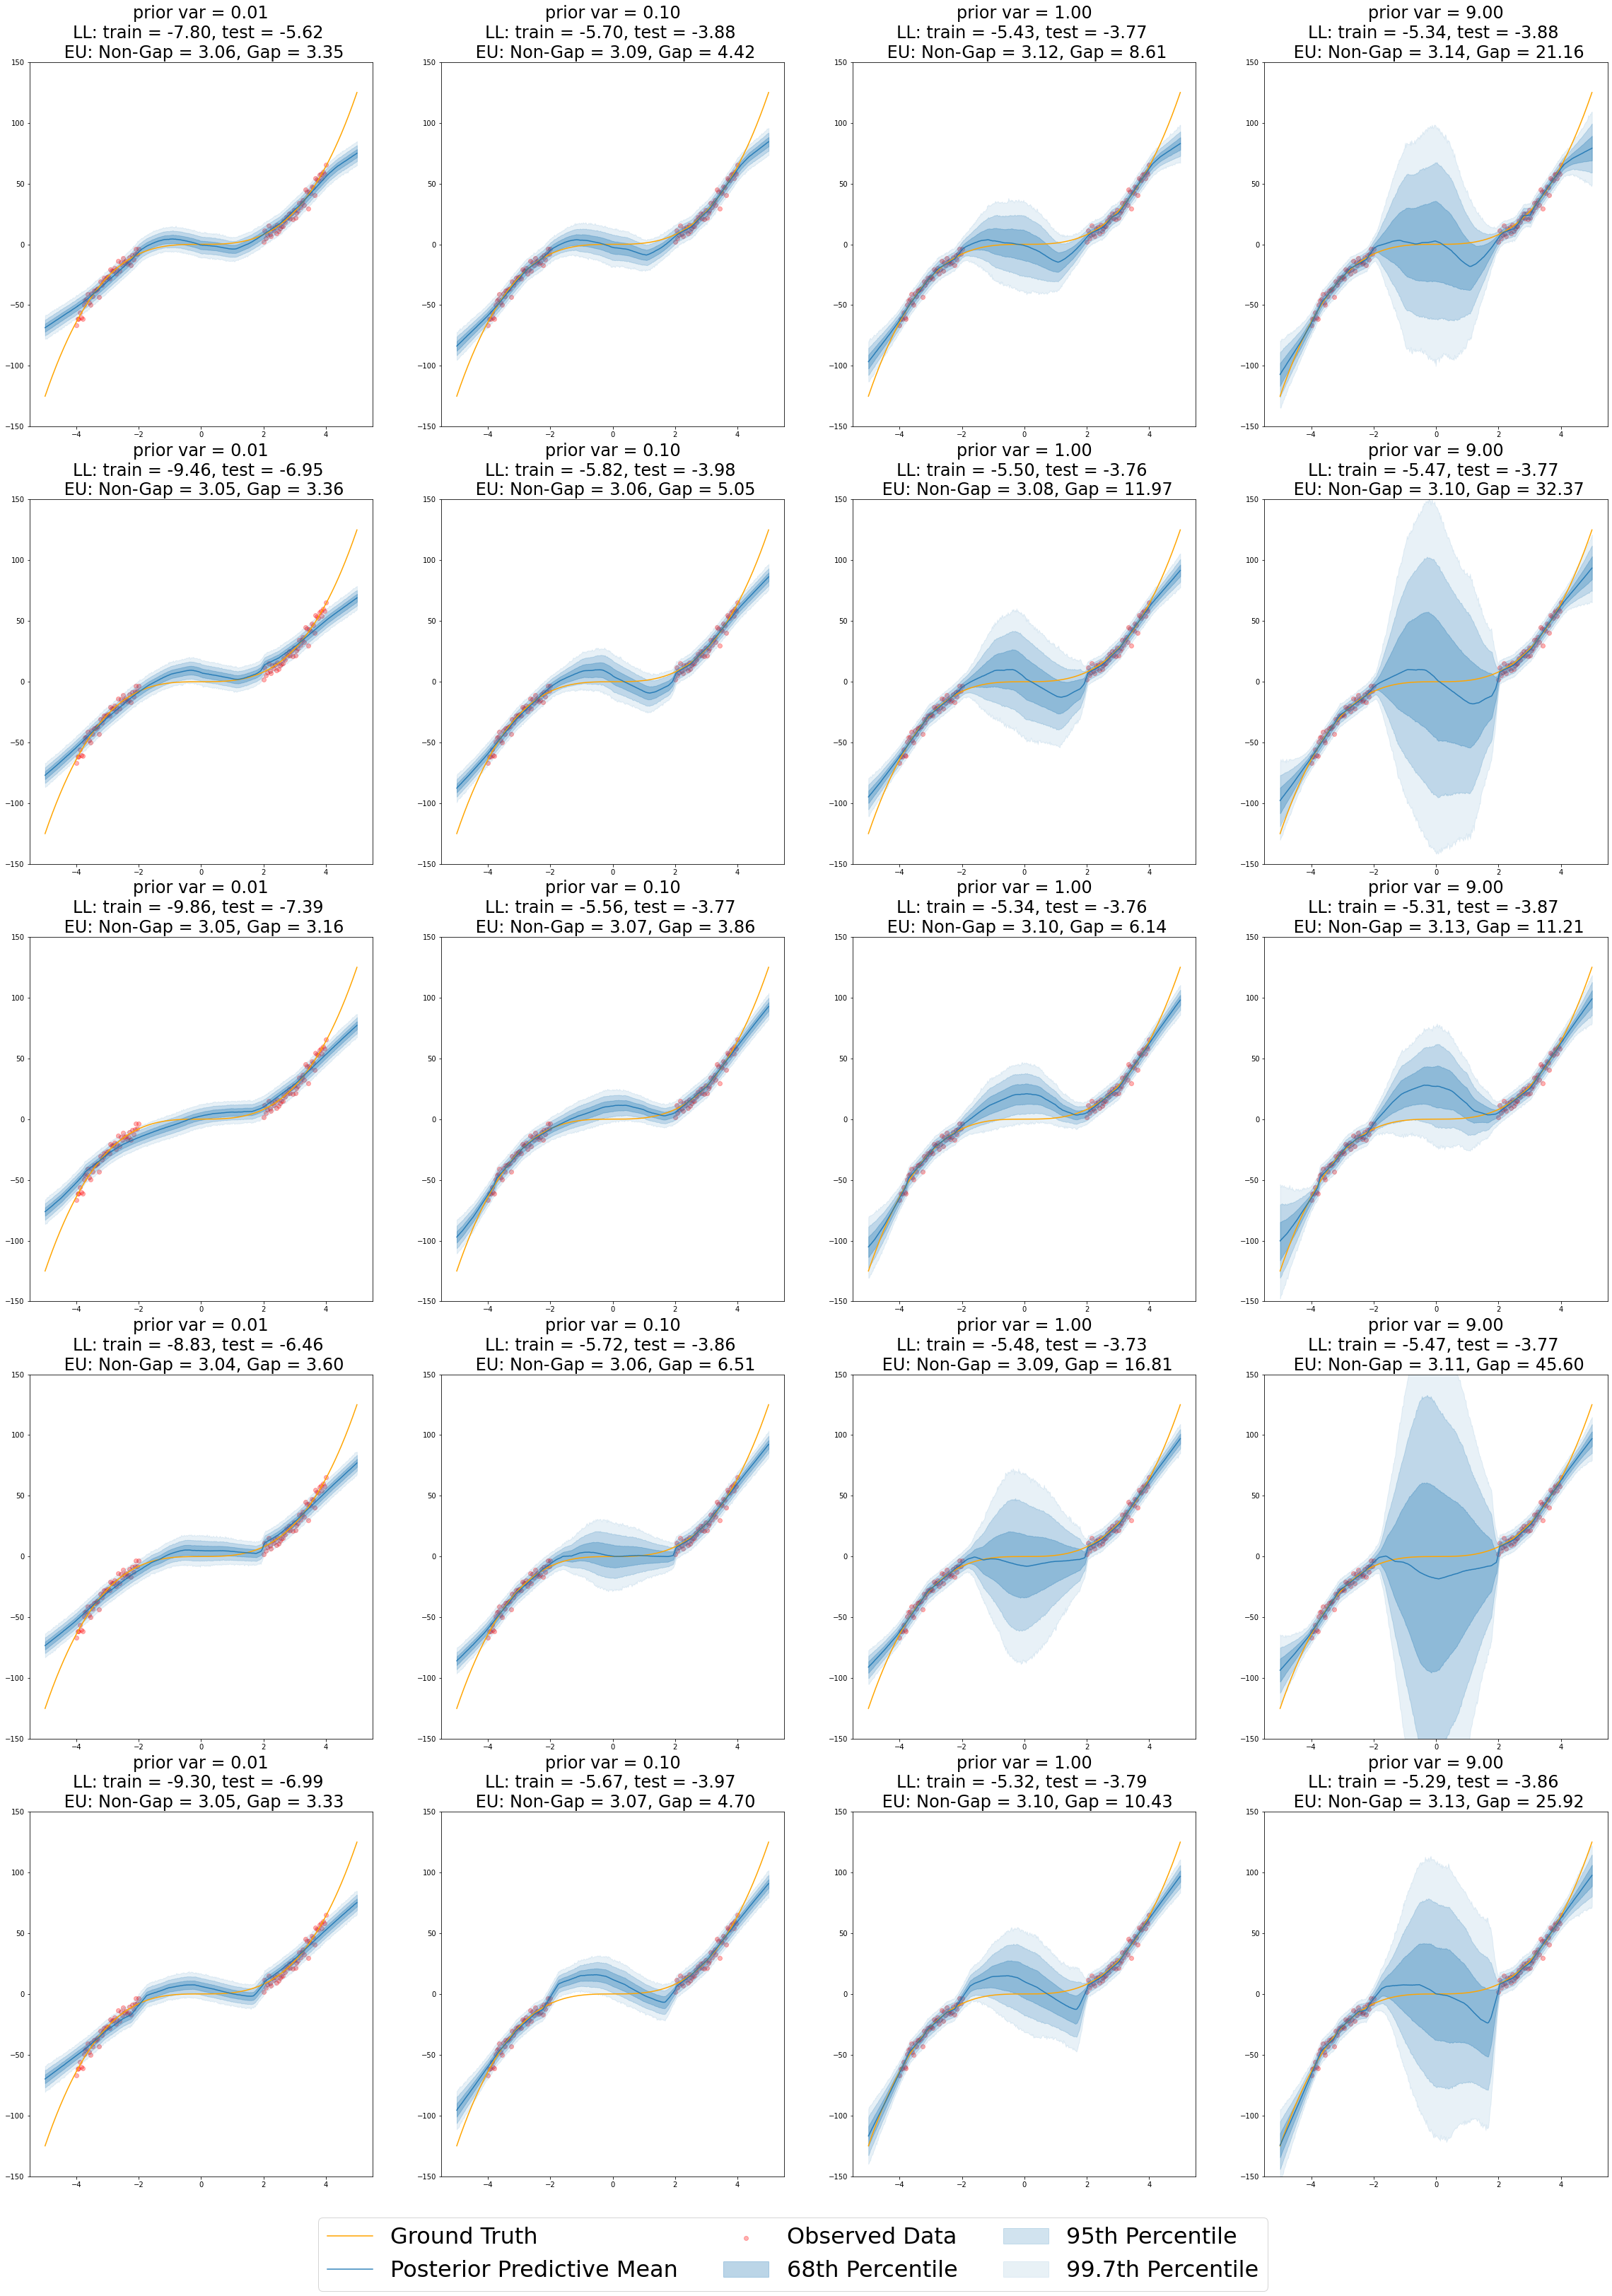

In [13]:
# Compute neg_log_likelihood and epistemic uncertainty on test data (gap vs. non-gap)
gap_idx = np.logical_and(x_test > -2, x_test < 2)
x_test_gap = x_test[gap_idx].reshape(1,-1)
y_test_gap = x_test_gap**3

non_gap_idx = np.logical_or(np.logical_and(x_test > -4, x_test < -2),np.logical_and(x_test > 2, x_test < 4))
x_test_non_gap = x_test[non_gap_idx].reshape(1,-1)
y_test_non_gap = x_test_non_gap**3

fig, axs = plt.subplots(5, 4, figsize = (40, 55))

for i, nlm in enumerate(nlms):
        
    for j, prior_var in enumerate([0.01, 0.1, 1, 9]):
        ax = axs[i, j]

        noise_var = 9
        
        y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
        y_posterior = y_posterior + np.random.normal(0, noise_var**0.5, size=y_posterior.shape)

        posterior_predictive_train = nlm.get_posterior_preds(x, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
        posterior_predictive_train = posterior_predictive_train + np.random.normal(0, noise_var**0.5, size=posterior_predictive_train.shape)

        posterior_predictive_gap = nlm.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
        posterior_predictive_gap = posterior_predictive_gap + np.random.normal(0, noise_var**0.5, size=posterior_predictive_gap.shape)

        posterior_predictive_non_gap = nlm.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
        posterior_predictive_non_gap = posterior_predictive_non_gap + np.random.normal(0, noise_var**0.5, size=posterior_predictive_non_gap.shape)

        lls_train = neg_log_likelihood(posterior_predictive_train, y, noise_var) * -1
        lls_test = neg_log_likelihood(posterior_predictive_non_gap, y_test_non_gap, noise_var) * -1

        eus_gap = epistemic_uncertainty(posterior_predictive_gap)
        eus_non_gap = epistemic_uncertainty(posterior_predictive_non_gap)

        # Calculating Percentiles
        pp_upper = np.percentile(y_posterior, 97.5, axis=0)
        pp_lower = np.percentile(y_posterior, 2.5, axis=0)
        pp_upper2 = np.percentile(y_posterior, 84, axis=0)
        pp_lower2 = np.percentile(y_posterior, 16, axis=0)
        pp_upper3 = np.percentile(y_posterior, 99.85, axis=0)
        pp_lower3 = np.percentile(y_posterior, 0.15, axis=0)
        pp_mean = np.mean(y_posterior, axis=0)

        # Visualizing 68%/95%/99.7% posterior predictive interval of Bayesian polynomial regression
        ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
        ax.plot(x_test[0,:], y_test[0,:], color='orange', label="Ground Truth")
        ax.plot(x_test[0,:], pp_mean, color='tab:blue', alpha=0.9, label='Posterior Predictive Mean')
        ax.fill_between(x_test[0,:], pp_upper2, pp_lower2, color = 'tab:blue', alpha = 0.3, label="68th Percentile")
        ax.fill_between(x_test[0,:], pp_upper, pp_lower, color='tab:blue', alpha=0.2, label="95th Percentile")
        ax.fill_between(x_test[0,:], pp_upper3, pp_lower3, color = 'tab:blue', alpha = 0.1, label="99.7th Percentile")

        ax.set_ylim([-150, 150])

        ax.set_title("prior var = {:.2f}\nLL: train = {:.2f}, test = {:.2f} \n EU: Non-Gap = {:.2f}, Gap = {:.2f}".format(prior_var, lls_train, lls_test, eus_non_gap, eus_gap), fontsize = 24)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor = (0.5, 0.08), fontsize = 32)

plt.show()

We see that prior variance greatly affects the uncertainty behavior in the data-scare region. The paper claims that NLM inconsistently gives good uncertainty behavior, but this appears to be only true for lower prior variances. 